# **UPDATED EPSILON IBEA**

## **ZDT6**

In [ ]:
import numpy as np
from random import randint, random, sample, seed
from itertools import chain

#-------- Step 1. Initialisation --------

#Parameters
population_size = 100
N = 60  # maximum number of generations
k = 0.5  # fitness scaling factor
ZDT6_IBEA_Ie_indicator = []
num_variables = 100  # number of decision variables for DTLZ6
seed(46)

def initialize_population(population_size, num_variables):
    population = []
    for _ in range(population_size):
        individual = np.random.rand(num_variables)
        population.append(individual)
    return population

# Assuming n = 10 and variables are in the range [0, 1]
initial_population = []
initial_population = initialize_population(population_size, num_variables)

# Display the initial population
print(initial_population)

m = 0 # generation counter
print("Generation number: ", m)
print(len(initial_population))

#-------- Step 2. Fitness Assignment --------

# As I've understood, here the loop begins
while m < N:
  # Step 2.0: Define ZDT6 objective function
  def zdt6_objective_function(individual):
    x1 = individual[0]
    g = 1 + 9 * sum(individual[1:]) / (num_variables - 1)
    h = 1 - np.sqrt(x1 / g)
    f1 = (1 - np.exp(-4 * x1)) * np.sin(6 * np.pi * x1)
    f2 = 1 - (f1 / g) ** 2

    return np.array([f1, f2])
    # f1 = individual[0]  # First objective
    # g = 1 + 9 * np.sum(individual[1:]) / (num_variables - 1)
    # h = 1 - np.sqrt(f1 / g) - (f1 / g) * np.sin(10 * np.pi * f1)
    # f2 = g * h  # Second objective

    # return np.array([f1, f2])

  # Step 2.1: Determine lower and upper bounds for each objective
  def calculate_bounds(objectives):
      lower_bounds = np.min(objectives, axis=0)
      upper_bounds = np.max(objectives, axis=0)
      return lower_bounds, upper_bounds

  # Step 2.2: Scale objectives to the internal [0,1]
  def scale_objectives(objectives, lower_bounds, upper_bounds):
      scaled_objectives = (objectives - lower_bounds) / (upper_bounds - lower_bounds)
      return scaled_objectives

  # Step 2.3: Calculate indicator values
  def calculate_indicator_values(scaled_objectives):
      num_objectives = scaled_objectives.shape[1]
      indicator_values = np.zeros((len(scaled_objectives), len(scaled_objectives)))

      for i in range(len(scaled_objectives)):
          for j in range(len(scaled_objectives)):
              if i != j:
                  diff = scaled_objectives[j] - scaled_objectives[i]
                  indicator_values[i, j] = np.min(diff)

      return indicator_values

  def get_c(indicator_values):
    c = np.max(np.abs(indicator_values))
    return c

  # Step 2.4: Assign fitness values
  def assign_fitness(indicator_values, k):
      c = get_c(indicator_values)
      fitness_values = np.zeros(len(indicator_values))

      for i in range(len(indicator_values)):
          sum_exp = np.sum(np.exp(-indicator_values[i] /(c * k)))
          fitness_values[i] = sum_exp

      return fitness_values

  # Define objectives
  objectives = np.array([zdt6_objective_function(individual) for individual in initial_population])

  # Step 2.1: Calculate lower and upper bounds
  lower_bounds, upper_bounds = calculate_bounds(objectives)

  # Step 2.2: Scale objectives to [0,1]
  scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)

  # Step 2.3: Calculate indicator values
  indicator_values = calculate_indicator_values(scaled_objectives)

  # Step 2.4: Assign fitness values
  fitness_values = assign_fitness(indicator_values, k)

# -------- Step 3. Environmental Selection --------

#Iterate until the population size exceeds population_size
  while len(initial_population) >= population_size:
      # Step 3.1: Choose an individual with the smallest fitness value
      min_fitness_index = np.argmin(fitness_values)
      x_star = initial_population[min_fitness_index]

      # Step 3.2: Remove x* from the population
      initial_population.pop(min_fitness_index)
      fitness_values = np.delete(fitness_values, min_fitness_index)
      print(len(initial_population))

      # Step 3.3: Update fitness values of the remaining individuals
      objectives = np.array([zdt6_objective_function(individual) for individual in initial_population])
      lower_bounds, upper_bounds = calculate_bounds(objectives)
      scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)
      indicator_values = calculate_indicator_values(scaled_objectives)
      ZDT6_IBEA_Ie_indicator = indicator_values
      fitness_values = assign_fitness(indicator_values, k)

# # -------- Step 4. Termination --------
#   if m >= N:
#     print("Pareto Set Approximation: ")
#     A = [individual[0] for individual in initial_population if individual[1] == min(fitness_values)]
#     print(A)
#     break

# -------- Step 5. Mating Selection --------
  selected_indices = [randint(0, len(initial_population) - 1) for _ in range(len(initial_population))]
  mating_pool = [initial_population[index] for index in selected_indices]
  print("Mating Pool: ", len(mating_pool))

# -------- Step 6. Variation --------

  pc = 0.8 # probability of crossover
  pm = 0.04 # probability of mutation

  # Simple single-point crossover
  def crossover(parent1, parent2):
    print("Parent1: ", len(parent1))
    print("Parent2: ", len(parent2))
    crossover_point = randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    #child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1#, child2

  # Simple mutation
  def mutate(individual):
    mutation_point = randint(0, len(individual) - 1)
    #individual[mutation_point] = 1 - individual[mutation_point]  # Flip the bit
    individual[mutation_point] = randint(0, 1)
    return individual

  # Apply crossover with probability crossover_probability
  if random() < pc:
    print("Crossover")
    parent1, parent2 = sample(mating_pool, 2)
    child1 = crossover(parent1, parent2)
  else:
    # If no crossover, select one parent randomly
    child1 = list(chain(*sample(mating_pool, 1))) #child1 = child2 = sample(mating_pool, 1)#[0][0]

  # Apply mutation with probability mutation_probability
  if random() < pm:
    print("Mutation")
    child1 = mutate(child1)

  print("Child: ", child1, "Child length: ", len(child1))
  # Add offspring to the initial population
  initial_population.append(child1)
  #objectives = np.array([zdt6_objective_function(individual) for individual in initial_population])

  #print("New Population: ", initial_population)

  m += 1 # incrementing generation counter
  print("Generation number: ", m)

# -------- Step 4. Termination (In Fact Pareto Set Initialisation) --------

print("Pareto Set Approximation: ")
nondominated_indices = np.where(fitness_values == min(fitness_values))[0]
A = [initial_population[i] for i in nondominated_indices]
for individual in A:
  print(individual)

[array([1.51370900e-01, 4.68052724e-01, 4.27688964e-01, 4.15606912e-01,
       5.27354574e-01, 3.25775349e-01, 6.48204955e-01, 7.94890614e-01,
       3.70659610e-01, 1.78678367e-01, 5.12402330e-01, 5.02254787e-01,
       6.59349843e-01, 4.32501049e-01, 3.26437173e-01, 4.81047514e-01,
       5.56431278e-01, 6.89242887e-04, 6.30100192e-01, 2.39333028e-01,
       2.90063659e-01, 3.94462080e-01, 1.76267825e-01, 1.88204932e-01,
       5.67001445e-01, 2.28206564e-01, 5.37325810e-01, 2.46348603e-02,
       6.38563261e-01, 1.53819158e-01, 5.06666275e-01, 2.51566812e-02,
       2.85521883e-01, 8.14648995e-01, 6.84561617e-01, 2.31685191e-01,
       4.72231553e-01, 2.33821188e-01, 5.53477035e-01, 9.33348210e-01,
       3.62411996e-01, 1.00011075e-01, 6.69552200e-01, 5.13888520e-01,
       2.91754218e-01, 2.55601800e-01, 6.34188604e-01, 9.28456662e-01,
       4.29950698e-02, 6.32020809e-01, 6.59133582e-01, 7.84378661e-01,
       3.14379647e-01, 2.28496651e-01, 2.68241706e-01, 6.83208020e-02,
     

[[ 0.12914447  0.99934348]
 [ 0.01101943  0.9999967 ]
 [ 0.1214408   0.99958979]
 [ 0.78153799  0.98145112]
 [ 0.03742149  0.99995172]
 [ 0.35578917  0.99533948]
 [ 0.87516114  0.97718499]
 [ 0.13234307  0.99940128]
 [ 0.30630207  0.99716035]
 [ 0.30322504  0.99723013]
 [ 0.70318519  0.98228279]
 [-0.02484987  0.99998382]
 [ 0.36313186  0.99566589]
 [ 0.75614091  0.9818971 ]
 [ 0.25109058  0.99828585]
 [ 0.32171345  0.99676296]
 [ 0.78027653  0.97843532]
 [ 0.34972625  0.99603712]
 [ 0.01176622  0.9999954 ]
 [ 0.85627252  0.97349648]
 [ 0.76242537  0.98193405]
 [ 0.79752633  0.9794771 ]
 [ 0.76354203  0.9789664 ]
 [ 0.11991716  0.99956088]
 [ 0.05087838  0.99991844]
 [ 0.31436427  0.99678287]
 [ 0.31459179  0.99662074]
 [ 0.31349287  0.9973312 ]
 [ 0.13010182  0.99950829]
 [ 0.00404103  0.99999938]
 [-0.04457255  0.99992047]
 [-0.02096758  0.99998616]
 [ 0.70223602  0.98354752]
 [ 0.78276774  0.9811112 ]
 [-0.01997455  0.99998447]
 [ 0.1010156   0.99967046]
 [ 0.79717339  0.9813266 ]
 

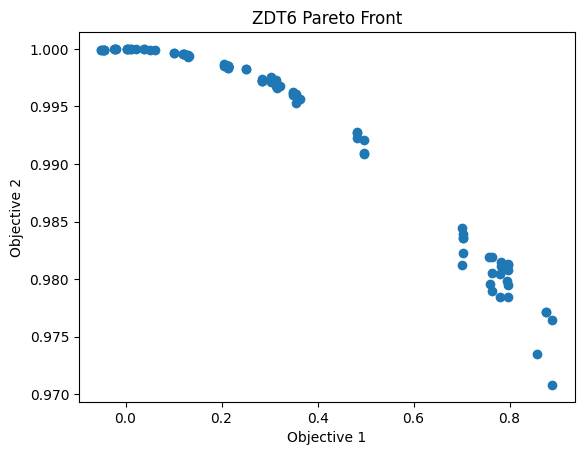

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, random, sample
from itertools import chain

# Initialize a list to store Pareto front objectives
pareto_front_objectives = []

# Store the Pareto front objectives
pareto_front_objectives.append(objectives)
print(objectives)

# Plotting the Pareto front
pareto_front_objectives = np.concatenate(pareto_front_objectives)
plt.scatter(pareto_front_objectives[:, 0], pareto_front_objectives[:, 1])
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('ZDT6 Pareto Front')
plt.show()

In [ ]:
print("ZDT6 Ie+ indicators", ZDT6_IBEA_Ie_indicator)

ZDT6 Ie+ indicators [[ 0.         -0.12576574 -0.00820196 ... -0.0362306  -0.6205127
  -0.75907076]
 [-0.02237693  0.         -0.01393934 ... -0.05860754 -0.64288963
  -0.78144769]
 [-0.0084376  -0.11756378  0.         ... -0.0446682  -0.62895029
  -0.76750835]
 ...
 [-0.12983398 -0.25559972 -0.13803594 ...  0.         -0.5842821
  -0.72284015]
 [-0.71161493 -0.83738067 -0.71981689 ... -0.58178095  0.
  -0.13855806]
 [-0.79427141 -0.92003715 -0.80247337 ... -0.66443743 -0.08265648
   0.        ]]


[[ 2.95651108e-01  9.97299153e-01]
 [ 7.21584334e-01  9.83114954e-01]
 [ 1.87838050e-01  9.98780896e-01]
 [ 2.80468272e-01  9.97466738e-01]
 [ 8.89329374e-01  9.74777389e-01]
 [ 2.46944764e-01  9.98035489e-01]
 [ 4.96887823e-01  9.93782686e-01]
 [ 5.96341159e-01  9.89802839e-01]
 [ 3.48470922e-03  9.99999559e-01]
 [ 5.93507065e-01  9.88412027e-01]
 [ 5.18024284e-02  9.99906587e-01]
 [ 8.64760895e-01  9.73357318e-01]
 [ 9.48746843e-01  9.65826411e-01]
 [ 9.04699982e-01  9.68717701e-01]
 [ 1.04017588e-01  9.99666841e-01]
 [ 8.23916929e-01  9.80732019e-01]
 [ 2.61389810e-01  9.97904772e-01]
 [ 6.43451854e-01  9.88146039e-01]
 [ 1.89967819e-01  9.98914450e-01]
 [ 5.56273111e-01  9.88121366e-01]
 [ 5.69543536e-03  9.99998923e-01]
 [ 6.34189201e-01  9.87598050e-01]
 [ 4.30774642e-01  9.93933992e-01]
 [ 9.20726918e-01  9.70768848e-01]
 [ 5.42953851e-01  9.91974802e-01]
 [ 8.63033268e-01  9.76326825e-01]
 [ 1.81384922e-01  9.98883170e-01]
 [ 6.92427584e-01  9.85559384e-01]
 [ 1.53266130e-04  9

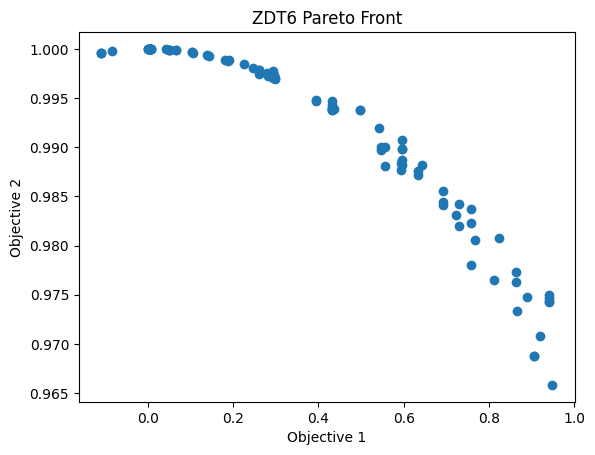

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, random, sample
from itertools import chain

# Initialize a list to store Pareto front objectives
pareto_front_objectives = []

# Store the Pareto front objectives
pareto_front_objectives.append(objectives)
print(objectives)

# Plotting the Pareto front
pareto_front_objectives = np.concatenate(pareto_front_objectives)
plt.scatter(pareto_front_objectives[:, 0], pareto_front_objectives[:, 1])
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('ZDT6 Pareto Front')
plt.show()

[[ 3.75150966e-01  9.95630524e-01]
 [ 2.91657881e-01  9.97651904e-01]
 [ 2.03875197e-01  9.98442589e-01]
 [ 1.21403827e-01  9.99450714e-01]
 [-2.56102622e-01  9.97795528e-01]
 [-2.21516638e-01  9.98036922e-01]
 [ 1.68765716e-01  9.99155841e-01]
 [ 1.85905685e-01  9.98898250e-01]
 [ 6.65153571e-02  9.99850338e-01]
 [ 2.06413055e-01  9.98839367e-01]
 [ 1.49005327e-04  9.99999999e-01]
 [ 2.15786402e-01  9.98491638e-01]
 [ 1.09988517e-01  9.99618516e-01]
 [ 7.37928025e-02  9.99812097e-01]
 [ 3.07960961e-01  9.97174497e-01]
 [-2.93820379e-02  9.99971595e-01]
 [ 7.12130266e-02  9.99831817e-01]
 [ 6.88587366e-01  9.84625740e-01]
 [ 2.74186363e-03  9.99999740e-01]
 [ 3.26269078e-01  9.96663081e-01]
 [ 3.09592095e-01  9.96294562e-01]
 [ 1.64486136e-01  9.99233869e-01]
 [ 5.37224390e-01  9.89965844e-01]
 [-1.64514360e-01  9.99082622e-01]
 [ 3.14195288e-01  9.96360817e-01]
 [ 3.67104205e-01  9.95195071e-01]
 [-2.03658463e-01  9.98693071e-01]
 [ 8.03001618e-01  9.77550275e-01]
 [ 2.71617566e-02  9

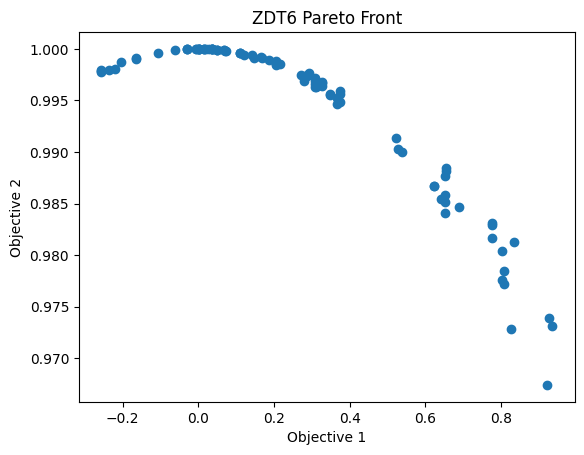

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, random, sample
from itertools import chain

# Initialize a list to store Pareto front objectives
pareto_front_objectives = []

# Store the Pareto front objectives
pareto_front_objectives.append(objectives)
print(objectives)

# Plotting the Pareto front
pareto_front_objectives = np.concatenate(pareto_front_objectives)
plt.scatter(pareto_front_objectives[:, 0], pareto_front_objectives[:, 1])
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('ZDT6 Pareto Front')
plt.show()

[[ 0.14039169  0.99934762]
 [-0.05062489  0.99993065]
 [ 0.23909343  0.99824437]
 [ 0.14353667  0.99934224]
 [ 0.00630773  0.99999882]
 [-0.0563775   0.99990494]
 [ 0.80119233  0.98305272]
 [ 0.76133972  0.98367027]
 [ 0.81098062  0.97770702]
 [ 0.07473284  0.99982286]
 [ 0.60919478  0.9895721 ]
 [ 0.71894155  0.98462997]
 [ 0.84854095  0.98074609]
 [ 0.18862215  0.99865868]
 [ 0.21342618  0.99824041]
 [ 0.27919918  0.9972656 ]
 [ 0.44714239  0.99226073]
 [ 0.16848361  0.9988362 ]
 [ 0.03906149  0.99993623]
 [ 0.23537239  0.99818916]
 [ 0.25896099  0.99815234]
 [ 0.30459276  0.99688113]
 [ 0.60056474  0.98843765]
 [ 0.28119408  0.9975335 ]
 [ 0.77376972  0.98019063]
 [-0.02339198  0.99998179]
 [ 0.11026955  0.99955591]
 [ 0.12549753  0.99933862]
 [ 0.1274305   0.99942434]
 [ 0.74861141  0.97991914]
 [ 0.49357881  0.9931524 ]
 [-0.00704442  0.99999824]
 [ 0.39463568  0.99469578]
 [ 0.1916109   0.99862398]
 [ 0.02645486  0.99998025]
 [ 0.03485247  0.99994596]
 [ 0.18611822  0.99887214]
 

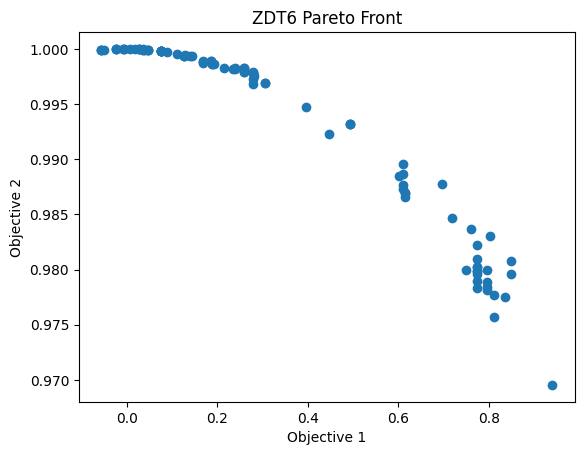

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, random, sample
from itertools import chain

# Initialize a list to store Pareto front objectives
pareto_front_objectives = []

# Store the Pareto front objectives
pareto_front_objectives.append(objectives)
print(objectives)

# Plotting the Pareto front
pareto_front_objectives = np.concatenate(pareto_front_objectives)
plt.scatter(pareto_front_objectives[:, 0], pareto_front_objectives[:, 1])
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('ZDT6 Pareto Front')
plt.show()

[[ 0.20658356  0.99869166]
 [ 0.04215718  0.99993772]
 [ 0.71281568  0.98268631]
 [ 0.80210894  0.9775311 ]
 [ 0.73667201  0.98215663]
 [ 0.66437703  0.98720785]
 [ 0.67062166  0.98611977]
 [ 0.7162867   0.98163501]
 [ 0.41783024  0.99505117]
 [ 0.01650759  0.99999092]
 [ 0.93019712  0.96512582]
 [ 0.05267979  0.999924  ]
 [ 0.93620956  0.9661402 ]
 [ 0.75935152  0.97879055]
 [ 0.16769973  0.9990173 ]
 [ 0.50607321  0.99349113]
 [ 0.8167718   0.98274217]
 [ 0.60463777  0.98744145]
 [ 0.03638052  0.99995484]
 [ 0.10964786  0.99952474]
 [ 0.13151985  0.99934943]
 [ 0.881266    0.9751159 ]
 [ 0.90812343  0.96471709]
 [ 0.10136749  0.99975448]
 [ 0.66753797  0.98502166]
 [ 0.76380199  0.97671855]
 [ 0.20432669  0.99878948]
 [ 0.0130016   0.99999336]
 [ 0.0310371   0.9999726 ]
 [ 0.63186957  0.98460519]
 [ 0.23139718  0.99842957]
 [ 0.24023652  0.99843869]
 [-0.03196198  0.99996525]
 [ 0.27502214  0.99778172]
 [ 0.13749844  0.99946752]
 [ 0.04407474  0.99994957]
 [ 0.20432669  0.99863549]
 

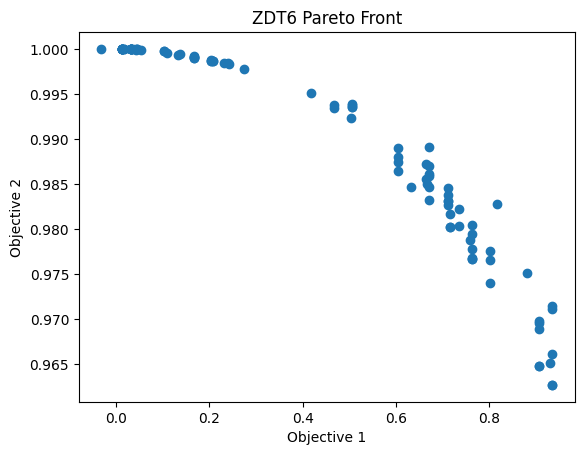

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, random, sample
from itertools import chain

# Initialize a list to store Pareto front objectives
pareto_front_objectives = []

# Store the Pareto front objectives
pareto_front_objectives.append(objectives)
print(objectives)

# Plotting the Pareto front
pareto_front_objectives = np.concatenate(pareto_front_objectives)
plt.scatter(pareto_front_objectives[:, 0], pareto_front_objectives[:, 1])
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('ZDT6 Pareto Front')
plt.show()

## **DTLZ2**

In [ ]:
import numpy as np
from random import randint, random, sample, seed
from itertools import chain

#-------- Step 1. Initialisation --------

#Parameters
population_size = 100
N = 100 # maximum number of generations
k = 0.5  # fitness scaling factor
DTLZ2_IBEA_Ie_indicator = []
num_variables = 100  # number of decision variables for DTLZ6
num_objectives = 3
seed(46)

def initialize_population(population_size, num_variables):
    population = []
    for _ in range(population_size):
        individual = np.random.rand(num_variables)
        population.append(individual)
    return population

# Assuming n = 10 and variables are in the range [0, 1]
initial_population = []
initial_population = initialize_population(population_size, num_variables)

# Display the initial population
#print(initial_population)

m = 0 # generation counter
print("Generation number: ", m)
print(len(initial_population))

#-------- Step 2. Fitness Assignment --------

# As I've understood, here the loop begins
while m < N:
  # Step 2.0: Define ZDT6 objective function
  def dtlz2_objective_function(individual):
    num_objectives = 3  # Assuming there are 3 objectives based on the return statement
    num_decision_variables = len(individual)
    individual = np.array(individual)
    g = np.sum((individual[num_objectives - 1:]) ** 2)
    f1 = (1 + g) * np.prod(np.cos(0.5 * np.pi * individual[:num_objectives - 1]))
    f2 = (1 + g) * np.prod(np.cos(0.5 * np.pi * individual[:num_objectives - 2]) * np.sin(0.5 * np.pi * individual[num_objectives - 1]))
    f3 = (1 + g) * np.sin(0.5 * np.pi * individual[num_objectives - 2])

    return np.array([f1, f2, f3])

    # g = np.sum((decision_variables[:, num_objectives - 1:]) ** 2, axis=1)
    # f1 = (1 + g) * np.prod(np.cos(0.5 * np.pi * decision_variables[:, :num_objectives - 1]), axis=1)
    # f2 = (1 + g) * np.prod(np.cos(0.5 * np.pi * decision_variables[:, :num_objectives - 2]) * np.sin(0.5 * np.pi * decision_variables[:, num_objectives - 1]), axis=1)
    # f3 = (1 + g) * np.sin(0.5 * np.pi * decision_variables[:, num_objectives - 2])

    # return np.array([f1, f2, f3])

  # Step 2.1: Determine lower and upper bounds for each objective
  def calculate_bounds(objectives):
      lower_bounds = np.min(objectives, axis=0)
      upper_bounds = np.max(objectives, axis=0)
      return lower_bounds, upper_bounds

  # Step 2.2: Scale objectives to the internal [0,1]
  def scale_objectives(objectives, lower_bounds, upper_bounds):
      scaled_objectives = (objectives - lower_bounds) / (upper_bounds - lower_bounds)
      return scaled_objectives

  # Step 2.3: Calculate indicator values
  def calculate_indicator_values(scaled_objectives):
      num_objectives = scaled_objectives.shape[1]
      indicator_values = np.zeros((len(scaled_objectives), len(scaled_objectives)))

      for i in range(len(scaled_objectives)):
          for j in range(len(scaled_objectives)):
              if i != j:
                  diff = scaled_objectives[j] - scaled_objectives[i]
                  indicator_values[i, j] = np.min(diff)

      return indicator_values

  def get_c(indicator_values):
    c = np.max(np.abs(indicator_values))
    return c

  # Step 2.4: Assign fitness values
  def assign_fitness(indicator_values, k):
      c = get_c(indicator_values)
      fitness_values = np.zeros(len(indicator_values))

      for i in range(len(indicator_values)):
          sum_exp = np.sum(np.exp(-indicator_values[i] /(c * k)))
          fitness_values[i] = sum_exp

      return fitness_values

  # Define objectives
  objectives = np.array([dtlz2_objective_function(individual) for individual in initial_population])
  #print("Objectives:", objectives)

  # Step 2.1: Calculate lower and upper bounds
  lower_bounds, upper_bounds = calculate_bounds(objectives)

  # Step 2.2: Scale objectives to [0,1]
  scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)

  # Step 2.3: Calculate indicator values
  indicator_values = calculate_indicator_values(scaled_objectives)

  # Step 2.4: Assign fitness values
  fitness_values = assign_fitness(indicator_values, k)

# -------- Step 3. Environmental Selection --------

#Iterate until the population size exceeds population_size
  while len(initial_population) >= population_size:
      # Step 3.1: Choose an individual with the smallest fitness value
      min_fitness_index = np.argmin(fitness_values)
      x_star = initial_population[min_fitness_index]

      # Step 3.2: Remove x* from the population
      initial_population.pop(min_fitness_index)
      fitness_values = np.delete(fitness_values, min_fitness_index)
      print(len(initial_population))

      # Step 3.3: Update fitness values of the remaining individuals
      objectives = np.array([dtlz2_objective_function(individual) for individual in initial_population])
      lower_bounds, upper_bounds = calculate_bounds(objectives)
      scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)
      indicator_values = calculate_indicator_values(scaled_objectives)
      DTLZ2_IBEA_Ie_indicator = indicator_values
      fitness_values = assign_fitness(indicator_values, k)

# # -------- Step 4. Termination --------
#   if m >= N:
#     print("Pareto Set Approximation: ")
#     A = [individual[0] for individual in initial_population if individual[1] == min(fitness_values)]
#     print(A)
#     break

# -------- Step 5. Mating Selection --------
  selected_indices = [randint(0, len(initial_population) - 1) for _ in range(len(initial_population))]
  mating_pool = [initial_population[index] for index in selected_indices]
  print("Mating Pool: ", len(mating_pool))

# -------- Step 6. Variation --------

  pc = 0.04 # probability of crossover
  pm = 0.99 # probability of mutation

  # Simple single-point crossover
  def crossover(parent1, parent2):
    print("Parent1: ", len(parent1))
    print("Parent2: ", len(parent2))
    crossover_point = randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    #child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1#, child2

  # Simple mutation
  def mutate(individual):
    mutation_point = randint(0, len(individual) - 1)
    #individual[mutation_point] = 1 - individual[mutation_point]  # Flip the bit
    individual[mutation_point] = randint(0, 1)
    return individual

  # Apply crossover with probability crossover_probability
  if random() < pc:
    print("Crossover")
    parent1, parent2 = sample(mating_pool, 2)
    child1 = crossover(parent1, parent2)
  else:
    # If no crossover, select one parent randomly
    child1 = list(chain(*sample(mating_pool, 1))) #child1 = child2 = sample(mating_pool, 1)#[0][0]

  # Apply mutation with probability mutation_probability
  if random() < pm:
    print("Mutation")
    child1 = mutate(child1)

  print("Child: ", child1, "Child length: ", len(child1))
  # Add offspring to the initial population
  initial_population.append(child1)
  #objectives = np.array([zdt6_objective_function(individual) for individual in initial_population])

  #print("New Population: ", initial_population)

  m += 1 # incrementing generation counter
  print("Generation number: ", m)

# -------- Step 4. Termination (In Fact Pareto Set Initialisation) --------

print("Pareto Set Approximation: ")
nondominated_indices = np.where(fitness_values == min(fitness_values))[0]
#print("Objectives:", objectives)
A = [initial_population[i] for i in nondominated_indices]
for individual in A:
  print(individual)

Generation number:  0
100
99
Mating Pool:  99
Mutation
Child:  [0.5013521864038012, 0.16518064157106616, 0.8354923349644517, 0.6932327337529571, 0.9747208341328698, 0.7911444549343742, 0.1434905946358317, 0.510874908969444, 0.25105180885691625, 0.40824978085742314, 0.9279795702881677, 0.009185125249124626, 0.651567356729709, 0.8032256900359155, 0.13576739263504178, 0.12410354561997627, 0.3578351792316078, 0.4502344227655589, 0.6202484441596461, 0.540652699374427, 0.5242088270652192, 0.7248013871922371, 0.1163676828598248, 0.7216583482936093, 0.8419934654956899, 0.5319057971440025, 0.5976782756259659, 0.7220727384493771, 0.19588798092571158, 0.0905992024647575, 0.6441971868885654, 0.12171942097694999, 0.680729478034787, 0.3600668198406556, 0.09134647108894811, 0.7731073500428768, 0.36828911520014584, 0.25197387346858946, 0.34762703893601754, 0.4955813567727445, 0.340044595375262, 0.07802467004350833, 0.5552695621481273, 0.9283779232725994, 0.13014134253279708, 0.641544850138057, 0.00958

[[24.28842799 26.84544894 23.63430975]
 [27.18302604 16.83924657  8.46344836]
 [23.8488809  10.84230693 31.54773477]
 [ 5.02392353 32.4674023  32.19006543]
 [30.2645844  11.15935499 15.96507757]
 [25.08037448  7.76331566 13.43911625]
 [28.46199041 27.8962091   5.02785988]
 [ 5.00339321 32.48494038 34.96972327]
 [29.46620431 34.07559744 30.35374409]
 [12.70444498 28.26123515 30.97028446]
 [28.69849569 18.90243935 13.15730944]
 [19.66288911 32.80622855 26.86444262]
 [30.88884591 22.43348916  0.58503589]
 [ 7.32162531 38.3129512  38.22018977]
 [27.88166995 33.16156494 22.35072332]
 [36.49619951 36.80294092  5.89549867]
 [30.65943043 30.25268686  0.50634858]
 [ 2.31248701 36.81073727 39.33156302]
 [ 1.2817545  28.01339269 33.32653017]
 [14.79810393 21.33084292 32.10534953]
 [ 1.52391205 10.42265558 36.56203006]
 [20.68054409 22.76479168 26.91056068]
 [27.05135624  4.90673583  9.06075458]
 [ 9.1124826  13.90924128 36.20946173]
 [23.14516991 26.43545554 21.7340166 ]
 [ 8.95469371 23.11397734

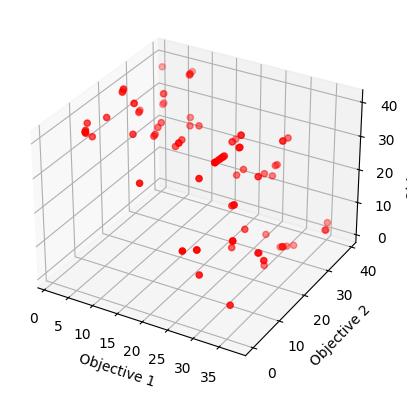

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have a list of nondominated individuals in the variable A
# A = [individual1, individual2, ...]

# Extract objective values for plotting
#objectives = np.array([dtlz2_objective_function(individual) for individual in A])
print(objectives)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(objectives[:, 0], objectives[:, 1], objectives[:, 2], c='r', marker='o')

# Set labels
ax.set_xlabel('Objective 1')
ax.set_ylabel('Objective 2')
ax.set_zlabel('Objective 3')

# Show the plot
plt.show()

In [ ]:
print("DTLZ2 IBEA Ie+ indicators:", DTLZ2_IBEA_Ie_indicator)

DTLZ2 IBEA Ie+ indicators: [[ 0.         -0.37758919 -0.40901327 ... -0.53420382 -0.03660315
  -0.4709432 ]
 [-0.08012278  0.         -0.15327164 ... -0.6143266   0.01287927
  -0.55106598]
 [-0.19695808 -0.57454727  0.         ... -0.52203711 -0.23356124
  -0.45877649]
 ...
 [-0.27966474 -0.65725393 -0.55079908 ...  0.         -0.31626789
   0.06326062]
 [-0.1543357  -0.41007733 -0.56334897 ... -0.62720587  0.
  -0.56394525]
 [-0.35692616 -0.73451535 -0.69582057 ... -0.14502149 -0.39352932
   0.        ]]


[[ 7.26194881 14.19146413 35.73147112]
 [ 4.2730151  30.99133212 31.03375329]
 [ 1.2635911   3.41891424 32.56086096]
 [18.86882424 28.78049551 26.11449517]
 [ 3.48500364  8.07177984 32.47292175]
 [12.49090308 23.91341796 32.11843373]
 [ 4.02099004  3.3208505  32.69468861]
 [24.85339785 22.59569443 15.7339565 ]
 [ 6.53382689 13.93591216 33.21146459]
 [29.50191496 25.97502809  3.01430648]
 [15.04681377 25.82385387 30.32557177]
 [ 1.67927701 27.74971391 37.52603065]
 [19.55427646 24.20637379 24.34604164]
 [ 5.2354862  29.22403056 35.33543719]
 [ 4.60528481 17.95008052 32.02607385]
 [11.95315688  4.40968777 30.71481325]
 [34.24500094 39.44291781 22.15049774]
 [21.91072889 16.7015417  24.30060416]
 [29.01919638 28.7088629  10.08214958]
 [25.23565935 34.26656376 23.61994126]
 [ 3.17938106 18.99639853 33.01808715]
 [27.27167149  2.13385757  8.50050631]
 [31.39638027 34.62321548 16.73671682]
 [28.2530601  32.41958473 21.34895092]
 [27.08083469 18.02851546  4.95757915]
 [ 0.25634231  5.89341169

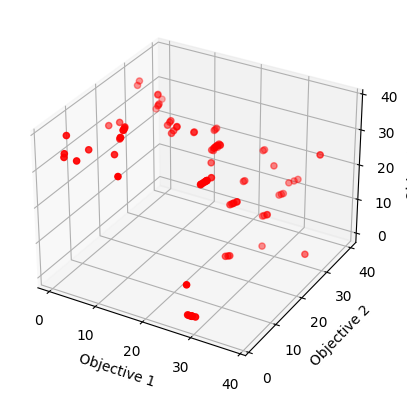

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have a list of nondominated individuals in the variable A
# A = [individual1, individual2, ...]

# Extract objective values for plotting
#objectives = np.array([dtlz2_objective_function(individual) for individual in A])
print(objectives)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(objectives[:, 0], objectives[:, 1], objectives[:, 2], c='r', marker='o')

# Set labels
ax.set_xlabel('Objective 1')
ax.set_ylabel('Objective 2')
ax.set_zlabel('Objective 3')

# Show the plot
plt.show()

In [ ]:
import numpy as np
from random import seed
seed(46)

# Parameters
population_size = 100
num_variables = 100
num_objectives = 3

def initialize_population(population_size, num_variables):
    population = []
    for _ in range(population_size):
        individual = np.random.rand(num_variables)
        population.append(individual)
    return np.array(population)

def dtlz2_objective_functions(decision_variables, num_objectives):
    g = np.sum((decision_variables[:, num_objectives - 1:]) ** 2, axis=1)
    f1 = (1 + g) * np.prod(np.cos(0.5 * np.pi * decision_variables[:, :num_objectives - 1]), axis=1)
    f2 = (1 + g) * np.prod(np.cos(0.5 * np.pi * decision_variables[:, :num_objectives - 2]) * np.sin(0.5 * np.pi * decision_variables[:, num_objectives - 1]), axis=1)
    f3 = (1 + g) * np.sin(0.5 * np.pi * decision_variables[:, num_objectives - 2])
    return np.column_stack((f1, f2, f3))

# Initialize population
initial_population = initialize_population(population_size, num_variables)

# Calculate objective values for DTLZ2
initial_objectives = dtlz2_objective_functions(initial_population, num_objectives)

# Display the initial population and their objective values
print("Initial Population:")
print(initial_population)
print("\nInitial Objective Values (DTLZ2):")
print(initial_objectives)


Initial Population:
[[0.20482977 0.51874395 0.84410221 ... 0.96826555 0.35027584 0.63912305]
 [0.45399436 0.75778962 0.03645877 ... 0.94494148 0.96342683 0.16238288]
 [0.23755825 0.45460695 0.37563351 ... 0.59776971 0.4662093  0.55208799]
 ...
 [0.21668742 0.75889758 0.85177804 ... 0.4364275  0.73656372 0.45284194]
 [0.50098036 0.79699163 0.39270448 ... 0.71267472 0.06280735 0.43570099]
 [0.19187473 0.86418334 0.10946916 ... 0.13337828 0.53756546 0.41914656]]

Initial Objective Values (DTLZ2):
[[2.17846101e+001 8.81547975e-032 2.43565878e+001]
 [9.65849250e+000 1.30346420e-041 3.19301076e+001]
 [2.49159533e+001 1.44836489e-032 2.31899029e+001]
 [6.24432643e+000 1.77147746e-085 2.09851419e+001]
 [1.36774013e-001 1.48523471e-206 2.98849747e+001]
 [2.76709623e+001 8.67591637e-030 1.60461430e+001]
 [1.85877292e+001 5.03133654e-045 1.48952716e+001]
 [1.62661054e+001 1.13924146e-054 9.11993146e+000]
 [2.67439588e+001 3.47423011e-030 1.98203364e+001]
 [2.48787093e+001 1.54243027e-029 2.456089

In [ ]:
import numpy as np

def initialize_population(population_size, num_variables):
    population = []
    for _ in range(population_size):
        individual = np.random.rand(num_variables)
        population.append(individual)
    return population

def dtlz2_objective_function(individual):
    num_objectives = 3  # Assuming there are 3 objectives based on the return statement
    num_decision_variables = len(individual)

    g = np.sum((individual[num_objectives - 1:]) ** 2)
    f1 = (1 + g) * np.prod(np.cos(0.5 * np.pi * individual[:num_objectives - 1]))
    f2 = (1 + g) * np.prod(np.cos(0.5 * np.pi * individual[:num_objectives - 2]) * np.sin(0.5 * np.pi * individual[num_objectives - 1]))
    f3 = (1 + g) * np.sin(0.5 * np.pi * individual[num_objectives - 2])

    return np.array([f1, f2, f3])

# Example usage:
population_size = 10
num_variables = 5
initial_population = initialize_population(population_size, num_variables)

objectives = np.array([dtlz2_objective_function(individual) for individual in initial_population])
print(objectives)


[[1.50004053 2.45446247 2.23265636]
 [0.43863879 0.20068822 0.85552826]
 [0.54954251 0.55441891 0.79865235]
 [0.02102816 0.00490582 0.54966714]
 [0.61817125 0.26443815 0.87707752]
 [1.0490959  1.26929053 2.34672691]
 [0.88783563 1.73209267 2.19898576]
 [0.09761706 0.20096624 1.88518713]
 [0.07021524 0.29152829 1.6410253 ]
 [0.39153846 1.04827555 1.94382998]]


# **Adaptive IBEA Ie+ with the jmetal library**

In [ ]:
!pip install jmetalpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.8/205.8 kB 2.1 MB/s eta 0:00:00


In [ ]:
from jmetal.algorithm.multiobjective.ibea import IBEA
from jmetal.operator import PolynomialMutation, SBXCrossover
from jmetal.problem import ZDT6
from jmetal.util.solution import (
    print_function_values_to_file,
    print_variables_to_file,
    read_solutions,
)
from jmetal.util.termination_criterion import StoppingByEvaluations

if __name__ == "__main__":
    problem = ZDT6()
    problem.reference_front = read_solutions(filename="resources/reference_front/ZDT1.pf")

    algorithm = IBEA(
        problem=problem,
        kappa=0.05,
        population_size=100,
        offspring_population_size=100,
        mutation=PolynomialMutation(probability=1/ problem.number_of_variables(), distribution_index=20),
        crossover=SBXCrossover(probability=1, distribution_index=20),
        termination_criterion=StoppingByEvaluations(max_evaluations=1000),
    )

    algorithm.run()
    front = algorithm.get_result()
    print(front)

    # Save results to file
    print_function_values_to_file(front, "FUN." + algorithm.label)
    print_variables_to_file(front, "VAR." + algorithm.label)

    print(f"Algorithm: {algorithm.get_name()}")
    print(f"Problem: {problem.name()}")
    print(f"Computing time: {algorithm.total_computing_time}")

[2023-12-14 19:55:57,133] [jmetal.util.solution] [WARNING] Reference front file was not found at resources/reference_front/ZDT1.pf
[2023-12-14 19:55:57,139] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
DEBUG:jmetal.core.algorithm:Creating initial set of solutions...
[2023-12-14 19:55:57,202] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
DEBUG:jmetal.core.algorithm:Evaluating solutions...
[2023-12-14 19:55:57,207] [jmetal.core.algorithm] [DEBUG] Initializing progress...
DEBUG:jmetal.core.algorithm:Initializing progress...
[2023-12-14 19:55:57,211] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
DEBUG:jmetal.core.algorithm:Running main loop until termination criteria is met
[2023-12-14 19:55:59,436] [jmetal.core.algorithm] [DEBUG] Finished!
DEBUG:jmetal.core.algorithm:Finished!
[2023-12-14 19:55:59,442] [jmetal.util.solution] [INFO] Output file (function values): FUN.Epsilon-IBEA.ZDT6
INFO:jmetal.util.solution:Output f

[<jmetal.core.solution.FloatSolution object at 0x79019a57db40>, <jmetal.core.solution.FloatSolution object at 0x79019d73eef0>, <jmetal.core.solution.FloatSolution object at 0x79019a3ec700>, <jmetal.core.solution.FloatSolution object at 0x79019a3ecc40>, <jmetal.core.solution.FloatSolution object at 0x79019a3ee0e0>, <jmetal.core.solution.FloatSolution object at 0x79019a3eecb0>, <jmetal.core.solution.FloatSolution object at 0x7901d0a10ca0>, <jmetal.core.solution.FloatSolution object at 0x7901d0a10eb0>, <jmetal.core.solution.FloatSolution object at 0x79019a1a8eb0>, <jmetal.core.solution.FloatSolution object at 0x79019a3ee6e0>, <jmetal.core.solution.FloatSolution object at 0x79019a3ec4c0>, <jmetal.core.solution.FloatSolution object at 0x79019a3eda50>, <jmetal.core.solution.FloatSolution object at 0x79019a3ee920>, <jmetal.core.solution.FloatSolution object at 0x79019a68c9a0>, <jmetal.core.solution.FloatSolution object at 0x79019a68f130>, <jmetal.core.solution.FloatSolution object at 0x79019a

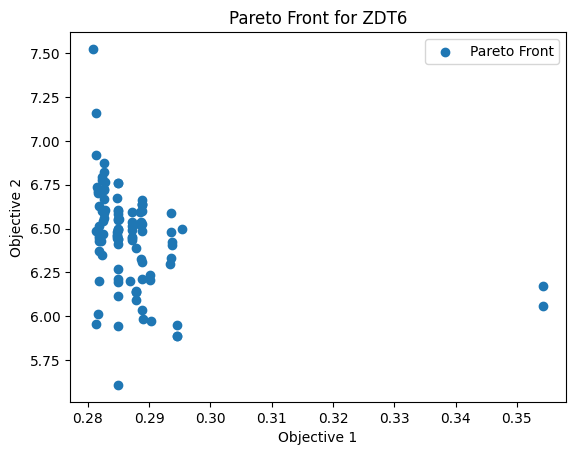

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to read data from a file
def read_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        data = [list(map(float, line.strip().split())) for line in lines]
    return np.array(data)

# File paths for function values and variable values
fun_file_path = "FUN." + algorithm.label
var_file_path = "VAR." + algorithm.label

#fun_file_path = "/content/FUN.Epsilon-IBEA.ZDT6"
#var_file_path = "/content/VAR.Epsilon-IBEA.ZDT6"

# Read function values and variable values from files
fun_data = read_data(fun_file_path)
var_data = read_data(var_file_path)

# Assuming a 2-objective problem, you can directly plot the points
plt.scatter(fun_data[:, 0], fun_data[:, 1], label="Pareto Front")
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.title("Pareto Front for ZDT6")
plt.legend()
plt.show()


In [ ]:
from jmetal.algorithm.multiobjective.ibea import IBEA
from jmetal.operator import PolynomialMutation, SBXCrossover
from jmetal.problem import DTLZ2
from jmetal.util.solution import (
    print_function_values_to_file,
    print_variables_to_file,
    read_solutions,
)
from jmetal.util.termination_criterion import StoppingByEvaluations

if __name__ == "__main__":
    problem = DTLZ2()
    problem.reference_front = read_solutions(filename="resources/reference_front/ZDT1.pf")

    algorithm = IBEA(
        problem=problem,
        kappa=0.5,
        population_size=100,
        offspring_population_size=100,
        mutation=PolynomialMutation(probability=1/ problem.number_of_variables(), distribution_index=20),
        crossover=SBXCrossover(probability=1, distribution_index=20),
        termination_criterion=StoppingByEvaluations(max_evaluations=1000),
    )

    algorithm.run()
    front = algorithm.get_result()
    print(front)

    # Save results to file
    print_function_values_to_file(front, "FUN." + algorithm.label)
    print_variables_to_file(front, "VAR." + algorithm.label)

    print(f"Algorithm: {algorithm.get_name()}")
    print(f"Problem: {problem.name()}")
    print(f"Computing time: {algorithm.total_computing_time}")

[2023-12-15 12:27:03,624] [jmetal.util.solution] [WARNING] Reference front file was not found at resources/reference_front/ZDT1.pf
[2023-12-15 12:27:03,630] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
DEBUG:jmetal.core.algorithm:Creating initial set of solutions...
[2023-12-15 12:27:03,682] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
DEBUG:jmetal.core.algorithm:Evaluating solutions...
[2023-12-15 12:27:03,688] [jmetal.core.algorithm] [DEBUG] Initializing progress...
DEBUG:jmetal.core.algorithm:Initializing progress...
[2023-12-15 12:27:03,693] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
DEBUG:jmetal.core.algorithm:Running main loop until termination criteria is met
[2023-12-15 12:27:06,368] [jmetal.core.algorithm] [DEBUG] Finished!
DEBUG:jmetal.core.algorithm:Finished!
[2023-12-15 12:27:06,375] [jmetal.util.solution] [INFO] Output file (function values): FUN.Epsilon-IBEA.DTLZ2
INFO:jmetal.util.solution:Output 

[<jmetal.core.solution.FloatSolution object at 0x784f96ed34c0>, <jmetal.core.solution.FloatSolution object at 0x784f96ed34c0>, <jmetal.core.solution.FloatSolution object at 0x784f96ed2110>, <jmetal.core.solution.FloatSolution object at 0x784f96ed3e20>, <jmetal.core.solution.FloatSolution object at 0x784f96ed2260>, <jmetal.core.solution.FloatSolution object at 0x784f96ed2260>, <jmetal.core.solution.FloatSolution object at 0x784f96ed1360>, <jmetal.core.solution.FloatSolution object at 0x784f96ed21d0>, <jmetal.core.solution.FloatSolution object at 0x784f96ed36a0>, <jmetal.core.solution.FloatSolution object at 0x784f96ed1270>, <jmetal.core.solution.FloatSolution object at 0x784f96e8e6e0>, <jmetal.core.solution.FloatSolution object at 0x784f96e8e6e0>, <jmetal.core.solution.FloatSolution object at 0x784f96ed2aa0>, <jmetal.core.solution.FloatSolution object at 0x784f96ed38e0>, <jmetal.core.solution.FloatSolution object at 0x784f96ed2020>, <jmetal.core.solution.FloatSolution object at 0x784fa1

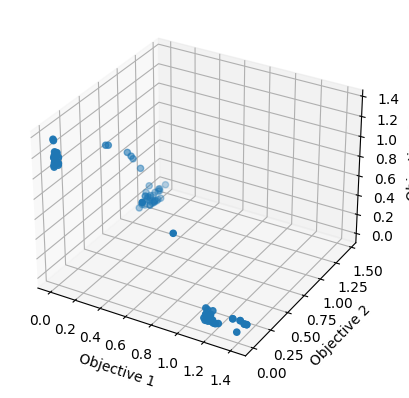

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to read data from a file
def read_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        data = [list(map(float, line.strip().split())) for line in lines]
    return np.array(data)

# File paths for function values and variable values
fun_file_path = "FUN." + algorithm.label
var_file_path = "VAR." + algorithm.label

#fun_file_path = "/content/FUN.Epsilon-IBEA.ZDT6"
#var_file_path = "/content/VAR.Epsilon-IBEA.ZDT6"

# Read function values and variable values from files
fun_data = read_data(fun_file_path)
var_data = read_data(var_file_path)

# Assuming a 2-objective problem, you can directly plot the points
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(fun_data[:, 0], fun_data[:, 1], fun_data[:, 2], label="Pareto Front")
# Set labels
ax.set_xlabel('Objective 1')
ax.set_ylabel('Objective 2')
ax.set_zlabel('Objective 3')

plt.show()


# **NSGA-II**

### **ZDT6**

In [ ]:
!pip install pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210078 sha256=70d84165a2a792102646ea5616499706e512ad54cc69c3b16d0d094ab740b5da
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


In [ ]:
import numpy as np
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.operators.crossover.pntx import TwoPointCrossover
from pymoo.operators.mutation.bitflip import BitflipMutation
from pymoo.operators.sampling.rnd import BinaryRandomSampling
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

# Define the ZDT5 problem
problem = get_problem("zdt6")

class NSGA2WithIePlusIndicator(NSGA2):
    def __init__(self, pop_size, sampling, crossover, mutation, eliminate_duplicates=True):
        super().__init__(pop_size=pop_size,
                         sampling=sampling,
                         crossover=crossover,
                         mutation=mutation,
                         eliminate_duplicates=eliminate_duplicates)

    def calculate_ie_plus_indicator(self, F, epsilon=0.01):
        n_points = F.shape[0]
        indicator_values = np.zeros((n_points, n_points))

        for i in range(n_points):
            for j in range(n_points):
                if i != j:
                    indicator_values[i, j] = np.max(F[j] - F[i])

        return indicator_values + epsilon

    def _next(self):
        super()._next()

        # Calculate indicator values
        indicator_values = self.calculate_ie_plus_indicator(self.pop.get("F"))

        # Assign fitness values
        c = np.max(np.abs(indicator_values))
        fitness_values = np.zeros(len(indicator_values))

        for i in range(len(indicator_values)):
            sum_exp = np.sum(np.exp(-indicator_values[i] / c))
            fitness_values[i] = sum_exp

        self.pop.set("fitness", fitness_values)

# Create the NSGA-II algorithm with Ie+-indicator
algorithm = NSGA2WithIePlusIndicator(pop_size=100,
                                      sampling=BinaryRandomSampling(),
                                      crossover=TwoPointCrossover(),
                                      mutation=BitflipMutation(),
                                      eliminate_duplicates=True)

# Run the optimization
res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               verbose=False)

NSGA_II_ZDT6_Ie_indicator = indicator_values
print("NSGA-II ZDT6 Ie+-indicator", NSGA_II_ZDT6_Ie_indicator)

NSGA-II ZDT6 Ie+-indicator [[ 0.         -0.37758919 -0.40901327 ... -0.53420382 -0.03660315
  -0.4709432 ]
 [-0.08012278  0.         -0.15327164 ... -0.6143266   0.01287927
  -0.55106598]
 [-0.19695808 -0.57454727  0.         ... -0.52203711 -0.23356124
  -0.45877649]
 ...
 [-0.27966474 -0.65725393 -0.55079908 ...  0.         -0.31626789
   0.06326062]
 [-0.1543357  -0.41007733 -0.56334897 ... -0.62720587  0.
  -0.56394525]
 [-0.35692616 -0.73451535 -0.69582057 ... -0.14502149 -0.39352932
   0.        ]]


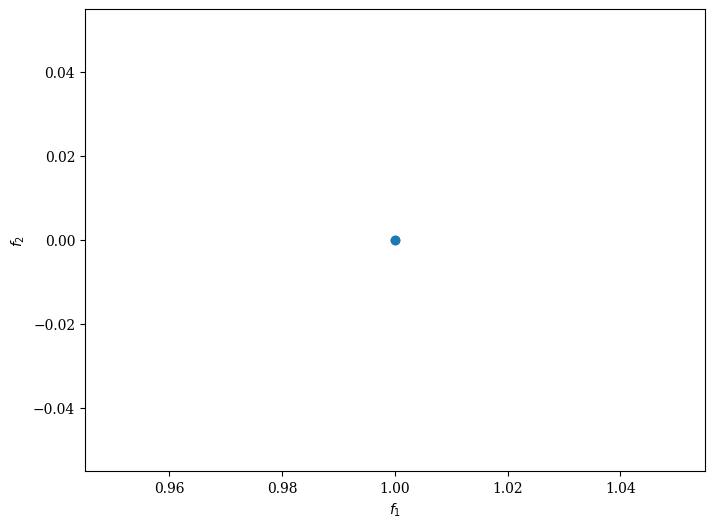

In [ ]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.operators.crossover.pntx import TwoPointCrossover
from pymoo.operators.mutation.bitflip import BitflipMutation
from pymoo.operators.sampling.rnd import BinaryRandomSampling
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt6")

algorithm = NSGA2(pop_size=100,
                  sampling=BinaryRandomSampling(),
                  crossover=TwoPointCrossover(),
                  mutation=BitflipMutation(),
                  eliminate_duplicates=True)

res = minimize(problem,
               algorithm,
               ('n_gen', 500),
               verbose=False)

Scatter().add(res.F).show()


### **DTLZ2**

In [ ]:
import numpy as np
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.operators.crossover.pntx import TwoPointCrossover
from pymoo.operators.mutation.bitflip import BitflipMutation
from pymoo.operators.sampling.rnd import BinaryRandomSampling
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

# Define the ZDT5 problem
problem = get_problem("dtlz2")

class NSGA2WithIePlusIndicator(NSGA2):
    def __init__(self, pop_size, sampling, crossover, mutation, eliminate_duplicates=True):
        super().__init__(pop_size=pop_size,
                         sampling=sampling,
                         crossover=crossover,
                         mutation=mutation,
                         eliminate_duplicates=eliminate_duplicates)

    def calculate_ie_plus_indicator(self, F, epsilon=0.01):
        n_points = F.shape[0]
        indicator_values = np.zeros((n_points, n_points))

        for i in range(n_points):
            for j in range(n_points):
                if i != j:
                    indicator_values[i, j] = np.max(F[j] - F[i])

        return indicator_values + epsilon

    def _next(self):
        super()._next()

        # Calculate indicator values
        indicator_values = self.calculate_ie_plus_indicator(self.pop.get("F"))

        # Assign fitness values
        c = np.max(np.abs(indicator_values))
        fitness_values = np.zeros(len(indicator_values))

        for i in range(len(indicator_values)):
            sum_exp = np.sum(np.exp(-indicator_values[i] / c))
            fitness_values[i] = sum_exp

        self.pop.set("fitness", fitness_values)

# Create the NSGA-II algorithm with Ie+-indicator
algorithm = NSGA2WithIePlusIndicator(pop_size=100,
                                      sampling=BinaryRandomSampling(),
                                      crossover=TwoPointCrossover(),
                                      mutation=BitflipMutation(),
                                      eliminate_duplicates=True)

# Run the optimization
res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               verbose=False)

NSGA_II_DTLZ2_Ie_indicator = indicator_values
print("NSGA-II DTLZ2 Ie+-indicator", NSGA_II_DTLZ2_Ie_indicator)

NSGA-II DTLZ2 Ie+-indicator [[ 0.         -0.37758919 -0.40901327 ... -0.53420382 -0.03660315
  -0.4709432 ]
 [-0.08012278  0.         -0.15327164 ... -0.6143266   0.01287927
  -0.55106598]
 [-0.19695808 -0.57454727  0.         ... -0.52203711 -0.23356124
  -0.45877649]
 ...
 [-0.27966474 -0.65725393 -0.55079908 ...  0.         -0.31626789
   0.06326062]
 [-0.1543357  -0.41007733 -0.56334897 ... -0.62720587  0.
  -0.56394525]
 [-0.35692616 -0.73451535 -0.69582057 ... -0.14502149 -0.39352932
   0.        ]]


### **DTLZ6**

In [ ]:
import numpy as np
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.operators.crossover.pntx import TwoPointCrossover
from pymoo.operators.mutation.bitflip import BitflipMutation
from pymoo.operators.sampling.rnd import BinaryRandomSampling
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

# Define the ZDT5 problem
problem = get_problem("dtlz6")

class NSGA2WithIePlusIndicator(NSGA2):
    def __init__(self, pop_size, sampling, crossover, mutation, eliminate_duplicates=True):
        super().__init__(pop_size=pop_size,
                         sampling=sampling,
                         crossover=crossover,
                         mutation=mutation,
                         eliminate_duplicates=eliminate_duplicates)

    def calculate_ie_plus_indicator(self, F, epsilon=0.01):
        n_points = F.shape[0]
        indicator_values = np.zeros((n_points, n_points))

        for i in range(n_points):
            for j in range(n_points):
                if i != j:
                    indicator_values[i, j] = np.min(F[j] - F[i])

        return indicator_values + epsilon

    def _next(self):
        super()._next()

        # Calculate indicator values
        indicator_values = self.calculate_ie_plus_indicator(self.pop.get("F"))

        # Assign fitness values
        c = np.max(np.abs(indicator_values))
        fitness_values = np.zeros(len(indicator_values))

        for i in range(len(indicator_values)):
            sum_exp = np.sum(np.exp(-indicator_values[i] / c))
            fitness_values[i] = sum_exp

        self.pop.set("fitness", fitness_values)

# Create the NSGA-II algorithm with Ie+-indicator
algorithm = NSGA2WithIePlusIndicator(pop_size=100,
                                      sampling=BinaryRandomSampling(),
                                      crossover=TwoPointCrossover(),
                                      mutation=BitflipMutation(),
                                      eliminate_duplicates=True)

# Run the optimization
res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               verbose=False)

NSGA_II_DTLZ6_Ie_indicator = indicator_values
print("NSGA-II DTLZ6 Ie+-indicator", NSGA_II_DTLZ6_Ie_indicator)

NSGA-II DTLZ6 Ie+-indicator [[ 0.00000000e+00 -6.44536351e-01 -2.49239767e-01 ... -4.22913175e-01
  -2.32173761e-01 -2.12518850e-01]
 [-9.00192865e-01  0.00000000e+00 -9.31910463e-02 ... -4.13052792e-01
  -3.46757505e-01 -2.34424238e-01]
 [-8.07001819e-01 -3.95296584e-01  0.00000000e+00 ... -3.35910296e-01
  -3.35910296e-01 -3.35565106e-01]
 ...
 [-4.87140073e-01 -2.21623177e-01  1.73673407e-01 ...  0.00000000e+00
   1.58833585e-22  3.45189709e-04]
 [-5.53435361e-01 -4.12362591e-01 -1.70660063e-02 ... -1.90739414e-01
   0.00000000e+00  3.45189709e-04]
 [-6.65768628e-01 -4.32017501e-01 -3.67209169e-02 ... -2.10394324e-01
  -1.12333267e-01  0.00000000e+00]]


### **ЧЕРНОВИК**

In [ ]:
import numpy as np

def kur_problem(solution):
    term1 = -10 * np.exp(-0.2 * np.sqrt(solution[0] ** 2 + solution[1] ** 2))
    term2 = -5 * np.exp(-0.2 * np.sqrt(solution[2] ** 2 + solution[3] ** 2))
    term3 = np.exp(-(solution[0] ** 2 + solution[1] ** 2) / 20.0)
    term4 = np.exp(-(solution[2] ** 2 + solution[3] ** 2) / 20.0)
    term5 = 10 * (np.sin(0.2 * np.pi * solution[0]) + np.sin(0.2 * np.pi * solution[1]))
    return term1 + term2 + term3 + term4 + term5

def initialize_population(population_size, variable_size):
    return [{'variables': np.random.rand(variable_size), 'fitness': 0.0, 'rank': 0, 'crowding_distance': 0.0}
            for _ in range(population_size)]

def crossover(parent1, parent2, crossover_probability=0.9):
    child1, child2 = np.copy(parent1['variables']), np.copy(parent2['variables'])
    if np.random.rand() < crossover_probability:
        crossover_point = np.random.randint(len(child1))
        child1[crossover_point:], child2[crossover_point:] = child2[crossover_point:], child1[crossover_point:]
    return {'variables': child1, 'fitness': 0.0, 'rank': 0, 'crowding_distance': 0.0}, \
           {'variables': child2, 'fitness': 0.0, 'rank': 0, 'crowding_distance': 0.0}

def mutate(solution, mutation_probability=1.0):
    mutated_solution = np.copy(solution['variables'])
    for i in range(len(mutated_solution)):
        if np.random.rand() < mutation_probability:
            mutated_solution[i] += np.random.normal(0, 1)
    return {'variables': mutated_solution, 'fitness': 0.0, 'rank': 0, 'crowding_distance': 0.0}

def non_dominated_sort(population):
    fronts = []
    current_front = []

    for solution in population:
        solution['dominated_solutions'] = []
        solution['dominance_rank'] = 0

        for other_solution in population:
            if solution['fitness'] < other_solution['fitness']:
                solution['dominated_solutions'].append(other_solution)
            elif solution['fitness'] > other_solution['fitness']:
                solution['dominance_rank'] += 1

        if solution['dominance_rank'] == 0:
            current_front.append(solution)

    fronts.append(current_front)
    i = 0

    while len(fronts[i]) > 0:
        next_front = []

        for solution in fronts[i]:
            for dominated_solution in solution['dominated_solutions']:
                dominated_solution['dominance_rank'] -= 1
                if dominated_solution['dominance_rank'] == 0:
                    next_front.append(dominated_solution)

        i += 1
        fronts.append(next_front)

    return fronts

def crowding_distance_sort(front):
    front_size = len(front)

    if front_size > 0:
        for solution in front:
            solution['crowding_distance'] = 0.0

        for m in range(len(front[0]['variables'])):
            front = sorted(front, key=lambda x: x['variables'][m])
            front[0]['crowding_distance'] = float('inf')
            front[front_size - 1]['crowding_distance'] = float('inf')

            for i in range(1, front_size - 1):
                front[i]['crowding_distance'] += (front[i + 1]['variables'][m] - front[i - 1]['variables'][m]) / \
                                                  (front[front_size - 1]['variables'][m] - front[0]['variables'][m])

def select_parents(population, tournament_size=2):
    tournament = np.random.choice(population, tournament_size, replace=False)
    best_parent = min(tournament, key=lambda x: (x['rank'], -x['crowding_distance']))
    return best_parent

def nsga2(population_size, generations, variable_size):
    population = initialize_population(population_size, variable_size)

    for generation in range(generations):
        # Evaluate the solutions using the KUR problem
        for solution in population:
            solution['fitness'] = kur_problem(solution['variables'])

        # Non-dominated sorting and crowding distance calculation
        fronts = non_dominated_sort(population)
        for front in fronts:
            crowding_distance_sort(front)

        # Create the next generation
        new_population = []
        while len(new_population) < population_size:
            parents = [select_parents(population) for _ in range(2)]
            child1, child2 = crossover(parents[0], parents[1])
            child1 = mutate(child1)
            child2 = mutate(child2)
            new_population.extend([child1, child2])

        # Combine the current and new populations
        combined_population = population + new_population

        # Non-dominated sorting and crowding distance calculation for the combined population
        fronts = non_dominated_sort(combined_population)
        for front in fronts:
            crowding_distance_sort(front)

        # Select the next population
        population = []
        for front in fronts:
            population.extend(front)
            if len(population) >= population_size:
                break

        # Placeholder for Ic+-indicator calculation
        ic_value = 0.0
        print(f"Generation {generation + 1}, Ic+-indicator: {ic_value}")

# Example usage
population_size = 100
generations = 50
variable_size = 4  # Assuming KUR problem has 4 variables
nsga2(population_size, generations, variable_size)


Generation 1, Ic+-indicator: 0.0
Generation 2, Ic+-indicator: 0.0
Generation 3, Ic+-indicator: 0.0
Generation 4, Ic+-indicator: 0.0
Generation 5, Ic+-indicator: 0.0
Generation 6, Ic+-indicator: 0.0
Generation 7, Ic+-indicator: 0.0
Generation 8, Ic+-indicator: 0.0
Generation 9, Ic+-indicator: 0.0
Generation 10, Ic+-indicator: 0.0
Generation 11, Ic+-indicator: 0.0
Generation 12, Ic+-indicator: 0.0
Generation 13, Ic+-indicator: 0.0
Generation 14, Ic+-indicator: 0.0
Generation 15, Ic+-indicator: 0.0
Generation 16, Ic+-indicator: 0.0
Generation 17, Ic+-indicator: 0.0
Generation 18, Ic+-indicator: 0.0
Generation 19, Ic+-indicator: 0.0
Generation 20, Ic+-indicator: 0.0
Generation 21, Ic+-indicator: 0.0
Generation 22, Ic+-indicator: 0.0
Generation 23, Ic+-indicator: 0.0
Generation 24, Ic+-indicator: 0.0
Generation 25, Ic+-indicator: 0.0
Generation 26, Ic+-indicator: 0.0
Generation 27, Ic+-indicator: 0.0
Generation 28, Ic+-indicator: 0.0
Generation 29, Ic+-indicator: 0.0
Generation 30, Ic+-indi

In [ ]:
import numpy as np

def kur_problem(solution):
    term1 = -10 * np.exp(-0.2 * np.sqrt(solution[0] ** 2 + solution[1] ** 2))
    term2 = -5 * np.exp(-0.2 * np.sqrt(solution[2] ** 2 + solution[3] ** 2))
    term3 = np.exp(-(solution[0] ** 2 + solution[1] ** 2) / 20.0)
    term4 = np.exp(-(solution[2] ** 2 + solution[3] ** 2) / 20.0)
    term5 = 10 * (np.sin(0.2 * np.pi * solution[0]) + np.sin(0.2 * np.pi * solution[1]))
    return term1 + term2 + term3 + term4 + term5

def initialize_population(population_size, variable_size):
    return [{'variables': np.random.rand(variable_size), 'fitness': 0.0, 'rank': 0, 'crowding_distance': 0.0}
            for _ in range(population_size)]

def crossover(parent1, parent2, crossover_probability=0.9):
    child1, child2 = np.copy(parent1['variables']), np.copy(parent2['variables'])
    if np.random.rand() < crossover_probability:
        crossover_point = np.random.randint(len(child1))
        child1[crossover_point:], child2[crossover_point:] = child2[crossover_point:], child1[crossover_point:]
    return {'variables': child1, 'fitness': 0.0, 'rank': 0, 'crowding_distance': 0.0}, \
           {'variables': child2, 'fitness': 0.0, 'rank': 0, 'crowding_distance': 0.0}

def mutate(solution, mutation_probability=1.0):
    mutated_solution = np.copy(solution['variables'])
    for i in range(len(mutated_solution)):
        if np.random.rand() < mutation_probability:
            mutated_solution[i] += np.random.normal(0, 1)
    return {'variables': mutated_solution, 'fitness': 0.0, 'rank': 0, 'crowding_distance': 0.0}

def non_dominated_sort(population):
    fronts = []
    current_front = []

    for solution in population:
        solution['dominated_solutions'] = []
        solution['dominance_rank'] = 0

        for other_solution in population:
            if solution['fitness'] < other_solution['fitness']:
                solution['dominated_solutions'].append(other_solution)
            elif solution['fitness'] > other_solution['fitness']:
                solution['dominance_rank'] += 1

        if solution['dominance_rank'] == 0:
            current_front.append(solution)

    fronts.append(current_front)
    i = 0

    while len(fronts[i]) > 0:
        next_front = []

        for solution in fronts[i]:
            for dominated_solution in solution['dominated_solutions']:
                dominated_solution['dominance_rank'] -= 1
                if dominated_solution['dominance_rank'] == 0:
                    next_front.append(dominated_solution)

        i += 1
        fronts.append(next_front)

    return fronts

def crowding_distance_sort(front):
    front_size = len(front)

    if front_size > 0:
        for solution in front:
            solution['crowding_distance'] = 0.0

        for m in range(len(front[0]['variables'])):
            front = sorted(front, key=lambda x: x['variables'][m])
            front[0]['crowding_distance'] = float('inf')
            front[front_size - 1]['crowding_distance'] = float('inf')

            for i in range(1, front_size - 1):
                front[i]['crowding_distance'] += (front[i + 1]['variables'][m] - front[i - 1]['variables'][m]) / \
                                                  (front[front_size - 1]['variables'][m] - front[0]['variables'][m])

def select_parents(population, tournament_size=2):
    tournament = np.random.choice(population, tournament_size, replace=False)
    best_parent = min(tournament, key=lambda x: (x['rank'], -x['crowding_distance']))
    return best_parent

def nsga2(population_size, generations, variable_size):
    population = initialize_population(population_size, variable_size)

    for generation in range(generations):
        # Evaluate the solutions using the KUR problem
        for solution in population:
            solution['fitness'] = kur_problem(solution['variables'])

        # Non-dominated sorting and crowding distance calculation
        fronts = non_dominated_sort(population)
        for front in fronts:
            crowding_distance_sort(front)

        # Create the next generation
        new_population = []
        while len(new_population) < population_size:
            parents = [select_parents(population) for _ in range(2)]
            child1, child2 = crossover(parents[0], parents[1])
            child1 = mutate(child1)
            child2 = mutate(child2)
            new_population.extend([child1, child2])

        # Combine the current and new populations
        combined_population = population + new_population

        # Non-dominated sorting and crowding distance calculation for the combined population
        fronts = non_dominated_sort(combined_population)
        for front in fronts:
            crowding_distance_sort(front)

        # Select the next population
        population = []
        for front in fronts:
            population.extend(front)
            if len(population) >= population_size:
                break

        # Placeholder for Ic+-indicator calculation
        ic_value = 0.0
        print(f"Generation {generation + 1}, Ic+-indicator: {ic_value}")

# Example usage
population_size = 100
generations = 50
variable_size = 4  # Assuming KUR problem has 4 variables
nsga2(population_size, generations, variable_size)

Generation 1, Ic+-indicator: 0.0
Generation 2, Ic+-indicator: 0.0
Generation 3, Ic+-indicator: 0.0
Generation 4, Ic+-indicator: 0.0
Generation 5, Ic+-indicator: 0.0
Generation 6, Ic+-indicator: 0.0
Generation 7, Ic+-indicator: 0.0
Generation 8, Ic+-indicator: 0.0
Generation 9, Ic+-indicator: 0.0
Generation 10, Ic+-indicator: 0.0
Generation 11, Ic+-indicator: 0.0
Generation 12, Ic+-indicator: 0.0
Generation 13, Ic+-indicator: 0.0
Generation 14, Ic+-indicator: 0.0
Generation 15, Ic+-indicator: 0.0
Generation 16, Ic+-indicator: 0.0
Generation 17, Ic+-indicator: 0.0
Generation 18, Ic+-indicator: 0.0
Generation 19, Ic+-indicator: 0.0
Generation 20, Ic+-indicator: 0.0
Generation 21, Ic+-indicator: 0.0
Generation 22, Ic+-indicator: 0.0
Generation 23, Ic+-indicator: 0.0
Generation 24, Ic+-indicator: 0.0
Generation 25, Ic+-indicator: 0.0
Generation 26, Ic+-indicator: 0.0
Generation 27, Ic+-indicator: 0.0
Generation 28, Ic+-indicator: 0.0
Generation 29, Ic+-indicator: 0.0
Generation 30, Ic+-indi

In [ ]:
import numpy as np
from random import randint, random, sample
from itertools import chain

# -------- Step 1. Initialization --------

# KUR problem parameters
population_size = 100
N = 200  # maximum number of generations
num_variables = 100  # number of decision variables for KUR
k = 0.05  # fitness scaling factor

np.random.seed(46)

# Generate random decision variable values for KUR
decision_variables = np.random.uniform(-5, 5, size=(population_size, num_variables))

# Generate initial population
def generate_population(population_size, num_items):
    population = []
    for _ in range(population_size):
        # Create a random binary string representing the presence or absence of each item in the knapsack
        chromosome = np.random.randint(2, size=num_items)
        population.append(chromosome)
    return population

# Example usage
initial_population = generate_population(population_size, num_variables)

m = 0  # generation counter
print("Generation number: ", m)
print(len(initial_population))

# -------- NSGA-II Main Loop --------

while m < N:
    # Step 2.0: Define KUR objective function
    def kur_objective_function(decision_variables):
        f1 = -10 * np.exp(-0.2 * np.sqrt(decision_variables[:, :-1] ** 2 + decision_variables[:, 1:] ** 2))
        f2 = np.abs(decision_variables[:, 2]) + 5 * np.sin(decision_variables[:, 2])
        return np.column_stack((f1, f2))

    # ... (Step 2.1 to Step 2.4 remain the same)

    # Step 3. Environmental Selection (Non-dominated Sorting + Crowding Distance)

    # Combine decision variables and objectives for sorting
    combined_population = list(zip(initial_population, objectives.tolist()))
    combined_population.sort(key=lambda x: x[1])

    fronts = []  # Fronts based on non-dominated sorting
    current_front = []
    remaining_population_size = population_size

    for ind, _ in combined_population:
        if remaining_population_size <= 0:
            break

        current_front.append(ind)
        remaining_population_size -= 1

    fronts.append(current_front)

    # Calculate crowding distance for each individual in each front
    crowding_distance = []

    for front in fronts:
        crowding_distance.extend(crowding_distance_assignment(front, objectives))

    # Select individuals based on non-dominated sorting and crowding distance
    selected_population = select_population(fronts, crowding_distance, population_size)

    # -------- NSGA-II Step 5. Mating Selection --------

    selected_indices = [randint(0, len(initial_population) - 1) for _ in range(len(initial_population))]
    mating_pool = [initial_population[index] for index in selected_indices]
    print("Mating Pool: ", len(mating_pool))

  # -------- Step 6. Variation --------

    pc = 0.8 # probability of crossover
    pm = 0.06 # probability of mutation

    # Simple single-point crossover
    def crossover(parent1, parent2):
      print("Parent1: ", len(parent1))
      print("Parent2: ", len(parent2))
      crossover_point = randint(1, len(parent1) - 1)
      child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
      #child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
      return child1#, child2

    # Simple mutation
    def mutate(individual):
      mutation_point = randint(0, len(individual) - 1)
      individual[mutation_point] = 1 - individual[mutation_point]  # Flip the bit
      return individual

    # Apply crossover with probability crossover_probability
    if random() < pc:
      print("Crossover")
      parent1, parent2 = sample(mating_pool, 2)
      child1 = crossover(parent1, parent2)
    else:
      # If no crossover, select one parent randomly
      child1 = list(chain(*sample(mating_pool, 1))) #child1 = child2 = sample(mating_pool, 1)#[0][0]

    # Apply mutation with probability mutation_probability
    if random() < pm:
      print("Mutation")
      child1 = mutate(child1)

    print("Child: ", child1, "Child length: ", len(child1))
    # Add offspring to the initial population
    initial_population.append((child1))
    objectives = kur_objective_function(decision_variables)

    #print("New Population: ", initial_population)

    m += 1 # incrementing generation counter
    print("Generation number: ", m)

  # -------- Step 4. Termination (In Fact Pareto Set Initialisation) --------

print("Pareto Set Approximation: ")
nondominated_indices = np.where(fitness_values == min(fitness_values))[0]
A = [initial_population[i] for i in nondominated_indices]
for individual in A:
  print(individual)

In [ ]:
import numpy as np
from random import randint, random, sample
from itertools import chain

#-------- Step 1. Initialisation --------

# KUR problem parameters
population_size = 100
N = 200  # maximum number of generations
k = 0.05  # fitness scaling factor

num_variables = 100  # number of decision variables for KUR

np.random.seed = 46
# Generate random decision variable values for KUR
decision_variables = np.random.uniform(-5, 5, size=(population_size, num_variables))

# Generate initial population
def generate_population(population_size, num_items):
    population = []
    for _ in range(population_size):
        # Create a random binary string representing the presence or absence of each item in the knapsack
        chromosome = np.random.randint(2, size=num_items)
        population.append(chromosome)
    return population

# Example usage
initial_population = generate_population(population_size, num_variables)
#print("Initial Population: ", initial_population)
m = 0 # generation counter
print("Generation number: ", m)
print(len(initial_population))

#-------- Step 2. Fitness Assignment --------

# As I've understood, here the loop begins
while m < N:
  # Step 2.0: Define KUR objective function
  def kur_objective_function(decision_variables):
      f1 = -10 * np.exp(-0.2 * np.sqrt(decision_variables[:, :-1]**2 + decision_variables[:, 1:]**2))
      f2 = np.abs(decision_variables[:, 2]) + 5 * np.sin(decision_variables[:, 2])

      return np.column_stack((f1, f2))

  # Step 2.1: Determine lower and upper bounds for each objective
  def calculate_bounds(objectives):
      lower_bounds = np.min(objectives, axis=0)
      upper_bounds = np.max(objectives, axis=0)
      return lower_bounds, upper_bounds

  # Step 2.2: Scale objectives to the internal [0,1]
  # Step 2.2: Scale objectives to the internal [0,1]
  def scale_objectives(objectives, lower_bounds, upper_bounds):
      num_objectives = objectives.shape[1]
      scaled_objectives = (objectives - lower_bounds[:num_objectives]) / (upper_bounds[:num_objectives] - lower_bounds[:num_objectives])
      return scaled_objectives

  # Step 2.3: Calculate indicator values
  def calculate_indicator_values(scaled_objectives):
      num_objectives = scaled_objectives.shape[1]
      indicator_values = np.zeros((len(scaled_objectives), len(scaled_objectives)))

      for i in range(len(scaled_objectives)):
          for j in range(len(scaled_objectives)):
              if i != j:
                  diff = scaled_objectives[j] - scaled_objectives[i]
                  indicator_values[i, j] = np.max(diff)

      return indicator_values

  def get_c(indicator_values):
    c = np.max(np.abs(indicator_values))
    return c

  # Step 2.4: Assign fitness values
  def assign_fitness(indicator_values, k):
      c = get_c(indicator_values)
      fitness_values = np.zeros(len(indicator_values))

      for i in range(len(indicator_values)):
          sum_exp = np.sum(np.exp(-indicator_values[i] / (c * k)))
          fitness_values[i] = sum_exp

      return fitness_values

  # Define objectives
  objectives = kur_objective_function(decision_variables)

  # Step 2.1: Calculate lower and upper bounds
  lower_bounds, upper_bounds = calculate_bounds(objectives)

  # Step 2.2: Scale objectives to [0,1]
  scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)

  # Step 2.3: Calculate indicator values
  indicator_values = calculate_indicator_values(scaled_objectives)

  # Step 2.4: Assign fitness values
  fitness_values = assign_fitness(indicator_values, k)

# -------- Step 3. Environmental Selection --------

#Iterate until the population size exceeds population_size
  while len(initial_population) >= population_size:
      # Step 3.1: Choose an individual with the smallest fitness value
      min_fitness_index = np.argmin(fitness_values)
      x_star = initial_population[min_fitness_index]

      # Step 3.2: Remove x* from the population
      initial_population.pop(min_fitness_index)
      fitness_values = np.delete(fitness_values, min_fitness_index)
      print(len(initial_population))

      # Step 3.3: Update fitness values of the remaining individuals
      objectives = zdt6_objective_function(decision_variables)
      scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)
      calculate_indicator_values(scaled_objectives)
      fitness_values_updated = assign_fitness(indicator_values, k)

# # -------- Step 4. Termination --------
#   if m >= N:
#     print("Pareto Set Approximation: ")
#     A = [individual[0] for individual in initial_population if individual[1] == min(fitness_values)]
#     print(A)
#     break

# -------- Step 5. Mating Selection --------
  selected_indices = [randint(0, len(initial_population) - 1) for _ in range(len(initial_population))]
  mating_pool = [initial_population[index] for index in selected_indices]
  print("Mating Pool: ", len(mating_pool))

# -------- Step 6. Variation --------

  pc = 0.8 # probability of crossover
  pm = 0.06 # probability of mutation

  # Simple single-point crossover
  def crossover(parent1, parent2):
    print("Parent1: ", len(parent1))
    print("Parent2: ", len(parent2))
    crossover_point = randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    #child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1#, child2

  # Simple mutation
  def mutate(individual):
    mutation_point = randint(0, len(individual) - 1)
    individual[mutation_point] = 1 - individual[mutation_point]  # Flip the bit
    return individual

  # Apply crossover with probability crossover_probability
  if random() < pc:
    print("Crossover")
    parent1, parent2 = sample(mating_pool, 2)
    child1 = crossover(parent1, parent2)
  else:
    # If no crossover, select one parent randomly
    child1 = list(chain(*sample(mating_pool, 1))) #child1 = child2 = sample(mating_pool, 1)#[0][0]

  # Apply mutation with probability mutation_probability
  if random() < pm:
    print("Mutation")
    child1 = mutate(child1)

  print("Child: ", child1, "Child length: ", len(child1))
  # Add offspring to the initial population
  initial_population.append((child1))
  objectives = kur_objective_function(decision_variables)

  #print("New Population: ", initial_population)

  m += 1 # incrementing generation counter
  print("Generation number: ", m)

# -------- Step 4. Termination (In Fact Pareto Set Initialisation) --------

print("Pareto Set Approximation: ")
nondominated_indices = np.where(fitness_values == min(fitness_values))[0]
A = [initial_population[i] for i in nondominated_indices]
for individual in A:
  print(individual)

In [ ]:
import numpy as np
from random import randint, random, sample
from itertools import chain

# NSGA-II parameters
population_size = 100
N = 200  # maximum number of generations
pc = 0.8  # probability of crossover
pm = 0.06  # probability of mutation
k = 0.05  # fitness scaling factor

# KUR problem parameters
num_variables = 100  # number of decision variables for KUR

# Initialize population
np.random.seed(46)
decision_variables = np.random.uniform(-5, 5, size=(population_size, num_variables))

def generate_population(population_size, num_items):
    population = []
    for _ in range(population_size):
        # Create a random binary string representing the presence or absence of each item in the knapsack
        chromosome = np.random.randint(2, size=num_items)
        population.append(chromosome)
    return population

initial_population = generate_population(population_size, num_variables)

# Main loop
m = 0  # generation counter
while m < N:
  # Step 2.0: Define KUR objective function
  def kur_objective_function(decision_variables):
      f1 = -10 * np.exp(-0.2 * np.sqrt(decision_variables[:, :-1]**2 + decision_variables[:, 1:]**2))
      f2 = np.abs(decision_variables[:, 2]) + 5 * np.sin(decision_variables[:, 2])

      return np.column_stack((f1, f2))

  # Step 2.1: Determine lower and upper bounds for each objective
  def calculate_bounds(objectives):
      lower_bounds = np.min(objectives, axis=0)
      upper_bounds = np.max(objectives, axis=0)
      return lower_bounds, upper_bounds

  # Step 2.2: Scale objectives to the internal [0,1]
  # Step 2.2: Scale objectives to the internal [0,1]
  def scale_objectives(objectives, lower_bounds, upper_bounds):
      num_objectives = objectives.shape[1]
      scaled_objectives = (objectives - lower_bounds[:num_objectives]) / (upper_bounds[:num_objectives] - lower_bounds[:num_objectives])
      return scaled_objectives

  # Step 2.3: Calculate indicator values
  def calculate_indicator_values(scaled_objectives):
      num_objectives = scaled_objectives.shape[1]
      indicator_values = np.zeros((len(scaled_objectives), len(scaled_objectives)))

      for i in range(len(scaled_objectives)):
          for j in range(len(scaled_objectives)):
              if i != j:
                  diff = scaled_objectives[j] - scaled_objectives[i]
                  indicator_values[i, j] = np.max(diff)

      return indicator_values

  def get_c(indicator_values):
    c = np.max(np.abs(indicator_values))
    return c

  # Step 2.4: Assign fitness values
  def assign_fitness(indicator_values, k):
      c = get_c(indicator_values)
      fitness_values = np.zeros(len(indicator_values))

      for i in range(len(indicator_values)):
          sum_exp = np.sum(np.exp(-indicator_values[i] / (c * k)))
          fitness_values[i] = sum_exp

      return fitness_values

  # Fitness assignment
  objectives = kur_objective_function(decision_variables)
  lower_bounds, upper_bounds = calculate_bounds(objectives)
  scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)
  indicator_values = calculate_indicator_values(scaled_objectives)
  fitness_values = assign_fitness(indicator_values, k)

  # Environmental Selection using Ic+ indicator
  #selected_indices = select_by_indicator(indicator_values, population_size)
  #mating_pool = [initial_population[index] for index in selected_indices]
  while len(initial_population) >= population_size:
      # Step 3.1: Choose an individual with the smallest fitness value
      min_fitness_index = np.argmin(fitness_values)
      x_star = initial_population[min_fitness_index]

      # Step 3.2: Remove x* from the population
      initial_population.pop(min_fitness_index)
      fitness_values = np.delete(fitness_values, min_fitness_index)
      print(len(initial_population))

      # Step 3.3: Update fitness values of the remaining individuals
      objectives = kur_objective_function(decision_variables)
      scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)
      calculate_indicator_values(scaled_objectives)
      fitness_values_updated = assign_fitness(indicator_values, k)

  # Mating Selection
  selected_indices = [randint(0, len(initial_population) - 1) for _ in range(len(initial_population))]
  mating_pool = [initial_population[index] for index in selected_indices]

  # Variation (Crossover and Mutation)
  def crossover(parent1, parent2):
    print("Parent1: ", len(parent1))
    print("Parent2: ", len(parent2))
    crossover_point = randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    #child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1#, child2


  # Simple mutation
  def mutate(individual):
    mutation_point = randint(0, len(individual) - 1)
    individual[mutation_point] = 1 - individual[mutation_point]  # Flip the bit
    return individual

  offspring_population = []
  for i in range(0, len(mating_pool) - 1, 2):
      parent1, parent2 = mating_pool[i], mating_pool[i + 1]
      child1 = crossover(parent1, parent2)
      child1 = mutate(child1)
      offspring_population.extend(child1)

  def dominates(objective_values1, objective_values2):
    dominates = False
    for i in range(len(objective_values1)):
        if objective_values1[i] < objective_values2[i]:
            dominates = True
        elif objective_values1[i] > objective_values2[i]:
            return False  # Not dominated if at least one objective is worse
    return dominates

  def non_dominated_sorting(population, objectives):
    fronts = []
    domination_count = {i: 0 for i in range(len(population))}
    dominated_set = {i: set() for i in range(len(population))}

    for i in range(len(population)):
        for j in range(len(population)):
            if i != j:
                if dominates(objectives[i], objectives[j]):
                    domination_count[j] += 1
                    dominated_set[i].add(j)
                elif dominates(objectives[j], objectives[i]):
                    domination_count[i] += 1
                    dominated_set[j].add(i)

    current_front = [i for i in range(len(population)) if domination_count[i] == 0]
    fronts.append(current_front)

    while current_front:
        next_front = []
        for i in current_front:
            for j in dominated_set[i]:
                domination_count[j] -= 1
                if domination_count[j] == 0:
                    next_front.append(j)

        current_front = next_front
        if current_front:
            fronts.append(current_front)

    return fronts

  # Non-dominated sorting
  # Combine parent and offspring populations
  combined_population = initial_population + offspring_population

  # Non-dominated sorting
  fronts = non_dominated_sorting(combined_population, objectives)

  # Select the next generation
  next_generation = []
  current_front = 0
  while len(next_generation) + len(fronts[current_front]) <= population_size:
      next_generation.extend(fronts[current_front])
      current_front += 1

  def calculate_crowding_distance(front, indicator_values):
    num_individuals = len(front)
    crowding_distances = np.zeros(num_individuals)

    for obj_index in range(indicator_values.shape[1]):
        obj_values = indicator_values[front, obj_index]
        sorted_indices = np.argsort(obj_values)

        crowding_distances[sorted_indices[0]] = float('inf')
        crowding_distances[sorted_indices[-1]] = float('inf')

        for i in range(1, num_individuals - 1):
            crowding_distances[sorted_indices[i]] += (obj_values[sorted_indices[i + 1]] - obj_values[sorted_indices[i - 1]])

    return crowding_distances

  # Sort individuals in the last front based on crowding distance
  crowding_distances = calculate_crowding_distance(fronts[current_front], indicator_values)
  sorted_indices = np.argsort(-crowding_distances)
  remaining_space = population_size - len(next_generation)
  next_generation.extend(fronts[current_front][sorted_indices[:remaining_space]])

  # Update the current population for the next generation
  initial_population = [combined_population[index] for index in next_generation]

  m += 1  # incrementing generation counter

# Output Pareto Set
print("Pareto Set Approximation: ")
for index in fronts[0]:
    print(initial_population[index])


99
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Parent2:  100
Parent1:  100
Par

IndexError: ignored

In [ ]:
from scipy.stats import ranksums

print("Wilcoxon Rank Sum Test: Adaptive IBEA KUR VS NSGA-II KUR")

# Perform the Wilcoxon Rank Sum Test
statistic, p_value = ranksums(KUR_Ic_indicator[-1], NSGA_II_Ic_indicator[-1])

print(f"Test Statistic (U): {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05 # the percentage
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

In [ ]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.operators.crossover.pntx import TwoPointCrossover
from pymoo.operators.mutation.bitflip import BitflipMutation
from pymoo.operators.sampling.rnd import BinaryRandomSampling
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt5")

algorithm = NSGA2(pop_size=100,
                  sampling=BinaryRandomSampling(),
                  crossover=TwoPointCrossover(),
                  mutation=BitflipMutation(),
                  eliminate_duplicates=True)

res = minimize(problem,
               algorithm,
               ('n_gen', 500),
               seed=1,
               verbose=False)

Scatter().add(res.F).show()

TypeError: ignored

In [ ]:
import numpy as np

NSGA_II_Ic_indicator = []
def kur_problem(solution):
    term1 = -10 * np.exp(-0.2 * np.sqrt(solution[0] ** 2 + solution[1] ** 2))
    term2 = -5 * np.exp(-0.2 * np.sqrt(solution[2] ** 2 + solution[3] ** 2))
    term3 = np.exp(-(solution[0] ** 2 + solution[1] ** 2) / 20.0)
    term4 = np.exp(-(solution[2] ** 2 + solution[3] ** 2) / 20.0)
    term5 = 10 * (np.sin(0.2 * np.pi * solution[0]) + np.sin(0.2 * np.pi * solution[1]))
    return term1 + term2 + term3 + term4 + term5

def scale_objective_values(population):
    num_objectives = len(population[0]['variables'])
    lower_bounds = np.min([solution['variables'] for solution in population], axis=0)
    upper_bounds = np.max([solution['variables'] for solution in population], axis=0)

    for solution in population:
        scaled_objectives = (solution['variables'] - lower_bounds) / (upper_bounds - lower_bounds)
        solution['scaled_fitness'] = kur_problem(scaled_objectives)

def calculate_scaled_indicator(solution1, solution2, c, k):
    scaled_objectives1 = (solution1['variables'] - np.min(solution1['variables'])) / (np.max(solution1['variables']) - np.min(solution1['variables']))
    scaled_objectives2 = (solution2['variables'] - np.min(solution2['variables'])) / (np.max(solution2['variables']) - np.min(solution2['variables']))

    scaled_indicator = kur_problem(scaled_objectives1) - kur_problem(scaled_objectives2)
    NSGA_II_Ic_indicator.append(scaled_indicator)
    return np.exp(-scaled_indicator / (c * k))

def nsga2(population_size, generations, variable_size, k=0.5):
    population = initialize_population(population_size, variable_size)

    for generation in range(generations):
        # Evaluate the solutions using the KUR problem
        for solution in population:
            solution['fitness'] = kur_problem(solution['variables'])

        # Scale objective values
        scale_objective_values(population)

        # Non-dominated sorting and crowding distance calculation
        fronts = non_dominated_sort(population)
        for front in fronts:
            crowding_distance_sort(front)

        # Create the next generation
        new_population = []
        while len(new_population) < population_size:
            parents = [select_parents(population) for _ in range(2)]
            child1, child2 = crossover(parents[0], parents[1])
            child1 = mutate(child1)
            child2 = mutate(child2)
            new_population.extend([child1, child2])

        # Combine the current and new populations
        combined_population = population + new_population

        # Non-dominated sorting and crowding distance calculation for the combined population
        fronts = non_dominated_sort(combined_population)
        for front in fronts:
            crowding_distance_sort(front)

        # Select the next population
        population = []
        for front in fronts:
            population.extend(front)
            if len(population) >= population_size:
                break

        # Calculate maximum absolute indicator value c
        # Calculate maximum absolute indicator value c
        c = max(
            abs(calculate_scaled_indicator(solution1, solution2, 1.0, k))
            for solution1 in population
            for solution2 in population
            if not np.array_equal(solution1['variables'], solution2['variables'])
        )

        # Fitness assignment using scaled indicator values
        # Fitness assignment using scaled indicator values
        for solution1 in population:
            solution1['fitness'] = sum(
                calculate_scaled_indicator(solution1, solution2, c, k)
                for solution2 in population
                if not np.array_equal(solution1['variables'], solution2['variables'])
            )

        # Placeholder for Ic+-indicator calculation

        print(f"Generation {generation + 1}, Ic+-indicator: {NSGA_II_Ic_indicator[-1]}")

# Example usage
population_size = 100
generations = 50
variable_size = 4  # Assuming KUR problem has 4 variables
nsga2(population_size, generations, variable_size)

NameError: ignored

# **Wilcoxon Rank Test**

### **Only Adaptive IBEA, Ic+-indicator comparison of effectiveness on problems ZDT6 and DTLZ2**

Performing a Wilcoxon Rank Sum Test involves comparing the performance of your algorithm on different problems. Here are the general steps you can follow:

**1. Data Preparation:**

– For each problem, you should have the indicator values obtained from running your algorithm multiple times.
– Organize your data so that you have a clear distinction between the performance on different problems.

**2. Pairwise Comparisons:**

– Select pairs of problems that you want to compare. For example, compare the indicator values for Knapsack with those for EXPO2, then EXPO3, and so on.
– Compute the differences between the indicator values for each pair.

**3. Ranking:**

– Combine the absolute differences and rank them from smallest to largest.
– Assign ranks, with ties receiving the average of the ranks they would occupy.

**4. Calculate the Test Statistic (U):**

– Calculate the sum of ranks for each problem across all pairs.
– Determine the smaller of the two sums of ranks; this is your test statistic U.

**5. Calculate P-Value:**

– Use the U value to obtain the corresponding p-value from the Wilcoxon rank-sum distribution table or use statistical software/tools.
– The p-value will indicate whether the observed differences in ranks are statistically significant.

**6. Interpret Results:**

– If the p-value is less than your chosen significance level (e.g., 0.05), you reject the null hypothesis, suggesting that there is a significant difference in performance between the two problems.

In [ ]:
from scipy.stats import ranksums

print("Wilcoxon Rank Sum Test: Adaptive IBEA ZDT6 VS Adaptive IBEA DTLZ2")

# Perform the Wilcoxon Rank Sum Test
statistic, p_value = ranksums(ZDT6_IBEA_Ie_indicator[-1], DTLZ2_IBEA_Ie_indicator[-1])

print(f"Test Statistic (U): {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05 # the percentage
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

Wilcoxon Rank Sum Test: Adaptive IBEA ZDT6 VS Adaptive IBEA DTLZ2
Test Statistic (U): -2.382463519581184
P-Value: 0.017197235805579216
Reject the null hypothesis. There is a significant difference.


### **Adaptive IBEA VS NSGA-II, comparison of algorithms on different problems by IC+-indicator**

**Revised Results**

In [ ]:
from scipy.stats import ranksums

print("Wilcoxon Rank Sum Test: Adaptive IBEA ZDT6 VS NSGA-II ZDT6")

# Perform the Wilcoxon Rank Sum Test
statistic, p_value = ranksums(ZDT6_IBEA_Ie_indicator[-1], NSGA_II_ZDT6_Ie_indicator[-1])

print(f"Test Statistic (U): {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05 # the percentage
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

Wilcoxon Rank Sum Test: Adaptive IBEA ZDT6 VS NSGA-II ZDT6
Test Statistic (U): -2.382463519581184
P-Value: 0.017197235805579216
Reject the null hypothesis. There is a significant difference.


In [ ]:
from scipy.stats import ranksums

dtlz2_nsga = [item for sublist in NSGA_II_DTLZ2_Ie_indicator for item in sublist]
dtlz2_ibea = [item for sublist in DTLZ2_IBEA_Ie_indicator for item in sublist]

print("Wilcoxon Rank Sum Test: Adaptive IBEA ZDT6 VS NSGA-II ZDT6")

# Perform the Wilcoxon Rank Sum Test
statistic, p_value = ranksums(dtlz2_ibea, dtlz2_nsga)
#print("DTLZ2 NSGA-II: ", NSGA_II_DTLZ2_Ie_indicator)
#print("DTLZ2 IBEA: ",DTLZ2_IBEA_Ie_indicator)

print(f"Test Statistic (U): {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05 # the percentage
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

Wilcoxon Rank Sum Test: Adaptive IBEA ZDT6 VS NSGA-II ZDT6
Test Statistic (U): 0.0
P-Value: 1.0
Fail to reject the null hypothesis. No significant difference.


**Old results**

In [ ]:
from scipy.stats import ranksums

print("Wilcoxon Rank Sum Test: Adaptive IBEA ZDT6 VS NSGA-II ZDT6")

# Perform the Wilcoxon Rank Sum Test
statistic, p_value = ranksums(ZDT6_Ic_indicator[-1], NSGA_II_ZDT6_Ie_indicator[-1])

print(f"Test Statistic (U): {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05 # the percentage
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

Wilcoxon Rank Sum Test: Adaptive IBEA KUR VS NSGA-II KUR
Test Statistic (U): -12.215722741186958
P-Value: 2.562143669163401e-34
Reject the null hypothesis. There is a significant difference.


In [ ]:
from scipy.stats import ranksums

print("Wilcoxon Rank Sum Test: Adaptive IBEA DTLZ2 VS NSGA-II DTLZ2")

# Perform the Wilcoxon Rank Sum Test
statistic, p_value = ranksums(DTLZ2_Ic_indicator[-1], NSGA_II_DTLZ2_Ie_indicator[-1])

print(f"Test Statistic (U): {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05 # the percentage
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

Wilcoxon Rank Sum Test: Adaptive IBEA DTLZ2 VS NSGA-II DTLZ2
Test Statistic (U): 11.683063963793469
P-Value: 1.5558433040447156e-31
Reject the null hypothesis. There is a significant difference.


In [ ]:
from scipy.stats import ranksums

print("Wilcoxon Rank Sum Test: Adaptive IBEA DTLZ6 VS NSGA-II DTLZ6")

# Perform the Wilcoxon Rank Sum Test
statistic, p_value = ranksums(DTLZ6_Ic_indicator[-1], NSGA_II_DTLZ6_Ie_indicator[-1])

print(f"Test Statistic (U): {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05 # the percentage
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

Wilcoxon Rank Sum Test: Adaptive IBEA DTLZ6 VS NSGA-II DTLZ6
Test Statistic (U): 0.0
P-Value: 1.0
Fail to reject the null hypothesis. No significant difference.


## **Unnecesary Wilcoxon Test Results**

### **Knapsack & All Others**

In [ ]:
from scipy.stats import ranksums

print("Wilcoxon Rank Sum Test: Knapsack VS EXPO2")
#knapsack_flat = [item for sublist in Knapsack_Ic_indicator for item in sublist]
#expo2_flat = [item for sublist in Expo2_Ic_indicator for item in sublist]

# Perform the Wilcoxon Rank Sum Test
statistic, p_value = ranksums(Knapsack_Ic_indicator[-1], Expo2_Ic_indicator[-1])

print(f"Test Statistic (U): {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

Wilcoxon Rank Sum Test: Knapsack VS EXPO2
Test Statistic (U): 0.5375455551677429
P-Value: 0.5908908264842505
Fail to reject the null hypothesis. No significant difference.


In [ ]:
print("Wilcoxon Rank Sum Test: Knapsack VS EXPO3")
#knapsack_flat = [item for sublist in Knapsack_Ic_indicator for item in sublist]
#expo2_flat = [item for sublist in Expo2_Ic_indicator for item in sublist]

# Perform the Wilcoxon Rank Sum Test
statistic, p_value = ranksums(Knapsack_Ic_indicator[-1], Expo3_Ic_indicator[-1])

print(f"Test Statistic (U): {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05 # the percentage
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

Wilcoxon Rank Sum Test: Knapsack VS EXPO3
Test Statistic (U): 5.426766718307078
P-Value: 5.73840493580879e-08
Reject the null hypothesis. There is a significant difference.


In [ ]:
print("Wilcoxon Rank Sum Test: Knapsack VS EXPO4")
#knapsack_flat = [item for sublist in Knapsack_Ic_indicator for item in sublist]
#expo2_flat = [item for sublist in Expo2_Ic_indicator for item in sublist]

# Perform the Wilcoxon Rank Sum Test
statistic, p_value = ranksums(Knapsack_Ic_indicator[-1], Expo4_Ic_indicator[-1])

print(f"Test Statistic (U): {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05 # the percentage
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

Wilcoxon Rank Sum Test: Knapsack VS EXPO4
Test Statistic (U): -4.730400885476138
P-Value: 2.240769070039408e-06
Reject the null hypothesis. There is a significant difference.


In [ ]:
print("Wilcoxon Rank Sum Test: Knapsack VS ZDT6")
#knapsack_flat = [item for sublist in Knapsack_Ic_indicator for item in sublist]
#expo2_flat = [item for sublist in Expo2_Ic_indicator for item in sublist]

# Perform the Wilcoxon Rank Sum Test
statistic, p_value = ranksums(Knapsack_Ic_indicator[-1], ZDT6_Ic_indicator[-1])

print(f"Test Statistic (U): {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05 # the percentage
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

Wilcoxon Rank Sum Test: Knapsack VS ZDT6
Test Statistic (U): 1.004232832608829
P-Value: 0.3152664000621992
Fail to reject the null hypothesis. No significant difference.


In [ ]:
print("Wilcoxon Rank Sum Test: Knapsack VS KUR")
#knapsack_flat = [item for sublist in Knapsack_Ic_indicator for item in sublist]
#expo2_flat = [item for sublist in Expo2_Ic_indicator for item in sublist]

# Perform the Wilcoxon Rank Sum Test
statistic, p_value = ranksums(Knapsack_Ic_indicator[-1], KUR_Ic_indicator[-1])

print(f"Test Statistic (U): {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05 # the percentage
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

Wilcoxon Rank Sum Test: Knapsack VS KUR
Test Statistic (U): 11.642748047155887
P-Value: 2.498339165293875e-31
Reject the null hypothesis. There is a significant difference.


In [ ]:
print("Wilcoxon Rank Sum Test: Knapsack VS DTLZ2")
#knapsack_flat = [item for sublist in Knapsack_Ic_indicator for item in sublist]
#expo2_flat = [item for sublist in Expo2_Ic_indicator for item in sublist]

# Perform the Wilcoxon Rank Sum Test
statistic, p_value = ranksums(Knapsack_Ic_indicator[-1], DTLZ2_Ic_indicator[-1])

print(f"Test Statistic (U): {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05 # the percentage
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

Wilcoxon Rank Sum Test: Knapsack VS DTLZ2
Test Statistic (U): -9.09429343788336
P-Value: 9.520346089295364e-20
Reject the null hypothesis. There is a significant difference.


In [ ]:
print("Wilcoxon Rank Sum Test: Knapsack VS DTLZ6")
#knapsack_flat = [item for sublist in Knapsack_Ic_indicator for item in sublist]
#expo2_flat = [item for sublist in Expo2_Ic_indicator for item in sublist]

# Perform the Wilcoxon Rank Sum Test
statistic, p_value = ranksums(Knapsack_Ic_indicator[-1], DTLZ6_Ic_indicator[-1])

print(f"Test Statistic (U): {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05 # the percentage
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

Wilcoxon Rank Sum Test: Knapsack VS DTLZ6
Test Statistic (U): 2.01335244299191
P-Value: 0.044077564903886396
Reject the null hypothesis. There is a significant difference.


### **EXPO2 & All Others**

In [ ]:
print("Wilcoxon Rank Sum Test: EXPO2 VS EXPO3")
#knapsack_flat = [item for sublist in Knapsack_Ic_indicator for item in sublist]
#expo2_flat = [item for sublist in Expo2_Ic_indicator for item in sublist]

# Perform the Wilcoxon Rank Sum Test
statistic, p_value = ranksums(Expo2_Ic_indicator[-1], Expo3_Ic_indicator[-1])

print(f"Test Statistic (U): {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05 # the percentage
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

Wilcoxon Rank Sum Test: EXPO2 VS EXPO3
Test Statistic (U): 5.746850662520598
P-Value: 9.092096277214045e-09
Reject the null hypothesis. There is a significant difference.


In [ ]:
print("Wilcoxon Rank Sum Test: EXPO2 VS EXPO4")
#knapsack_flat = [item for sublist in Knapsack_Ic_indicator for item in sublist]
#expo2_flat = [item for sublist in Expo2_Ic_indicator for item in sublist]

# Perform the Wilcoxon Rank Sum Test
statistic, p_value = ranksums(Expo2_Ic_indicator[-1], Expo4_Ic_indicator[-1])

print(f"Test Statistic (U): {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05 # the percentage
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

Wilcoxon Rank Sum Test: EXPO2 VS EXPO4
Test Statistic (U): -5.3705687739031776
P-Value: 7.848869257140647e-08
Reject the null hypothesis. There is a significant difference.


In [ ]:
print("Wilcoxon Rank Sum Test: EXPO2 VS ZDT6")
#knapsack_flat = [item for sublist in Knapsack_Ic_indicator for item in sublist]
#expo2_flat = [item for sublist in Expo2_Ic_indicator for item in sublist]

# Perform the Wilcoxon Rank Sum Test
statistic, p_value = ranksums(Expo2_Ic_indicator[-1], ZDT6_Ic_indicator[-1])

print(f"Test Statistic (U): {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05 # the percentage
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

Wilcoxon Rank Sum Test: EXPO2 VS ZDT6
Test Statistic (U): 0.30542361089076303
P-Value: 0.7600435414558657
Fail to reject the null hypothesis. No significant difference.


In [ ]:
print("Wilcoxon Rank Sum Test: EXPO2 VS KUR")
#knapsack_flat = [item for sublist in Knapsack_Ic_indicator for item in sublist]
#expo2_flat = [item for sublist in Expo2_Ic_indicator for item in sublist]

# Perform the Wilcoxon Rank Sum Test
statistic, p_value = ranksums(Expo2_Ic_indicator[-1], KUR_Ic_indicator[-1])

print(f"Test Statistic (U): {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05 # the percentage
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

Wilcoxon Rank Sum Test: EXPO2 VS KUR
Test Statistic (U): 11.913964213626885
P-Value: 1.0010242012503586e-32
Reject the null hypothesis. There is a significant difference.


In [ ]:
print("Wilcoxon Rank Sum Test: EXPO2 VS DTLZ2")
#knapsack_flat = [item for sublist in Knapsack_Ic_indicator for item in sublist]
#expo2_flat = [item for sublist in Expo2_Ic_indicator for item in sublist]

# Perform the Wilcoxon Rank Sum Test
statistic, p_value = ranksums(Expo2_Ic_indicator[-1], DTLZ2_Ic_indicator[-1])

print(f"Test Statistic (U): {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05 # the percentage
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

Wilcoxon Rank Sum Test: EXPO2 VS DTLZ2
Test Statistic (U): -9.692923715229256
P-Value: 3.2314315614655633e-22
Reject the null hypothesis. There is a significant difference.


In [ ]:
print("Wilcoxon Rank Sum Test: EXPO2 VS DTLZ6")
#knapsack_flat = [item for sublist in Knapsack_Ic_indicator for item in sublist]
#expo2_flat = [item for sublist in Expo2_Ic_indicator for item in sublist]

# Perform the Wilcoxon Rank Sum Test
statistic, p_value = ranksums(Expo2_Ic_indicator[-1], DTLZ6_Ic_indicator[-1])

print(f"Test Statistic (U): {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05 # the percentage
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

Wilcoxon Rank Sum Test: EXPO2 VS DTLZ6
Test Statistic (U): 1.8545321653287132
P-Value: 0.063663062788974
Fail to reject the null hypothesis. No significant difference.


# **Failed experiments**
Below you can see all my failed research. For some time I thought that I implemented everything right, but after comparing final objectives graphs with the true Pareto fronts of the problems, I understood that overlooked something very important. That was fixed, at the very least to some extent, in the Updated Epsilon IBEA paragraph of this notebook.

# **KNAPSACK PROBLEM**

### **Full-Code**

**Adaptive IBEA Algorithm**

**INPUT:** a = population_size, N = maximum number of generations, k = fitness scaling factor

**OUTPUT:** A = Pareto set approximation

**Step 1.** Generate an initial population P of size a; set the generation counter m to 0.

**Step 2.** First scale objective and indicator values, and then use scaled values to assign fitness values:

1. Determine for each objective fi its lower bound bi_low = minx E Pfi(x) and its upper bound bi_up = maxx E Pfi(x)
2. Scale each objective tp the internal [0,1], i.e., f'i(x) = (fi(x) - bi_low)/(bi_up - bi_low).
3. Calculate indicator values I(x^1, x^2) using the scaled objective values f'i instead of the original fi, and determine the naximum absolute indicator value c = maxx^1, x^2 E P^|I(x^1, x^2)|.
4. For all x^1 E P set F(x^1) = sum(x^2 E P\{x^1}^ (-e^(-I({x^2}, {x^1})/(c*k).

**Step 3.** Iterate the following three steps until the size of population P does not exceed the a (a.k.a. population size):

1. Choose an individual x* E P (a.k.a. population) with the smallest fitness value, i.e., F(x*) <= F(x) for all x E P.
2. Remove x* from the population.
3. Update the fitness values of the remaining individuals, i.e., F(x) = F(x) + e^(-I({x},{x})/ck) for all x E P.

**Step 4:** If m >= N or another stopping criterion is satisfied then set A to the set of decision vectors represented by the nondominated individuals in P. Stop.

**Step 5:** Perform binary tournament sekection with replacement on P in order to fill the temprorary mating pool P'.

**Step 6:** Apply recombination and mutation operators to the mating pool P' and add the resulting pffspring to P. Increment the generation counter (m = m+1) and go to the Step 2


In [ ]:
import numpy as np
from random import randint, random, sample
from itertools import chain

#-------- Step 1. Initialisation --------

population_size = 100
N = 200 # maximum number of generations
k = 0.05 # by Paragraph 4.1 in the paper

num_items = 100 #number of items for the 2-dimentional knapsack problem

np.random.seed = 46
# Generate random weights and values for each item
weights = np.random.randint(1, 10, size=num_items)
values = np.random.randint(1, 20, size=num_items)

# Generate initial population
def generate_population(population_size, num_items):
    population = []
    for _ in range(population_size):
        # Create a random binary string representing the presence or absence of each item in the knapsack
        chromosome = np.random.randint(2, size=num_items)
        population.append(chromosome)
    return population

# Example usage
initial_population = generate_population(population_size, num_items)
#print("Initial Population: ", initial_population)
m = 0 # generation counter
print("Generation number: ", m)
print(len(initial_population))

#-------- Step 2. Fitness Assignment --------

# As I've understood, here the loop begins
while m < N:
  # Step 2.0: Calculate total weight and total value for each individual in the population
  def calculate_objectives(population, weights, values):
      objectives = []

      for individual in population:
        total_weight = np.sum(individual * weights)
        total_value = np.sum(individual * values)
        objectives.append([total_weight, total_value])

      return np.array(objectives)

  # Step 2.1: Determine lower and upper bounds for each objective
  def calculate_bounds(objectives):
      lower_bounds = np.min(objectives, axis=0)
      upper_bounds = np.max(objectives, axis=0)
      return lower_bounds, upper_bounds

  # Step 2.2: Scale objectives to the internal [0,1]
  def scale_objectives(objectives, lower_bounds, upper_bounds):
      scaled_objectives = (objectives - lower_bounds) / (upper_bounds - lower_bounds)
      return scaled_objectives

  # Step 2.3: Calculate indicator values
  def calculate_indicator_values(scaled_objectives):
      num_objectives = scaled_objectives.shape[1]
      indicator_values = np.zeros((len(scaled_objectives), len(scaled_objectives)))

      for i in range(len(scaled_objectives)):
          for j in range(len(scaled_objectives)):
              if i != j:
                  diff = scaled_objectives[j] - scaled_objectives[i]
                  indicator_values[i, j] = np.min(diff)

      return indicator_values

  def get_c(indicator_values):
    c = np.max(np.abs(indicator_values))
    return c

  # Step 2.4: Assign fitness values
  def assign_fitness(indicator_values, k):
      c = get_c(indicator_values)
      fitness_values = np.zeros(len(indicator_values))

      for i in range(len(indicator_values)):
          sum_exp = np.sum(np.exp(-indicator_values[i] / (c * k)))
          fitness_values[i] = sum_exp

      return fitness_values

  # Define objectives
  objectives = calculate_objectives(initial_population, weights, values)

  # Step 2.1: Calculate lower and upper bounds
  lower_bounds, upper_bounds = calculate_bounds(objectives)

  # Step 2.2: Scale objectives to [0,1]
  scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)

  # Step 2.3: Calculate indicator values
  indicator_values = calculate_indicator_values(scaled_objectives)

  # Step 2.4: Assign fitness values
  fitness_values = assign_fitness(indicator_values, k)

# -------- Step 3. Environmental Selection --------

#Iterate until the population size exceeds population_size
  while len(initial_population) >= population_size:
      # Step 3.1: Choose an individual with the smallest fitness value
      min_fitness_index = np.argmin(fitness_values)
      x_star = initial_population[min_fitness_index]

      # Step 3.2: Remove x* from the population
      initial_population.pop(min_fitness_index)
      fitness_values = np.delete(fitness_values, min_fitness_index)
      print(len(initial_population))

      # Step 3.3: Update fitness values of the remaining individuals
      objectives = calculate_objectives(initial_population, weights, values)
      scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)
      calculate_indicator_values(scaled_objectives)
      fitness_values_updated = assign_fitness(indicator_values, k)

# # -------- Step 4. Termination --------
#   if m >= N:
#     print("Pareto Set Approximation: ")
#     A = [individual[0] for individual in initial_population if individual[1] == min(fitness_values)]
#     print(A)
#     break

# -------- Step 5. Mating Selection --------
  selected_indices = [randint(0, len(initial_population) - 1) for _ in range(len(initial_population))]
  mating_pool = [initial_population[index] for index in selected_indices]
  print("Mating Pool: ", len(mating_pool))

# -------- Step 6. Variation --------

  pc = 0.8 # probability of crossover
  pm = 0.06 # probability of mutation

  # Simple single-point crossover
  def crossover(parent1, parent2):
    print("Parent1: ", len(parent1))
    print("Parent2: ", len(parent2))
    crossover_point = randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    #child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1#, child2

  # Simple mutation
  def mutate(individual):
    mutation_point = randint(0, len(individual) - 1)
    individual[mutation_point] = 1 - individual[mutation_point]  # Flip the bit
    return individual

  # Apply crossover with probability crossover_probability
  if random() < pc:
    print("Crossover")
    parent1, parent2 = sample(mating_pool, 2)
    child1 = crossover(parent1, parent2)
  else:
    # If no crossover, select one parent randomly
    child1 = list(chain(*sample(mating_pool, 1))) #child1 = child2 = sample(mating_pool, 1)#[0][0]

  # Apply mutation with probability mutation_probability
  if random() < pm:
    print("Mutation")
    child1 = mutate(child1)

  print("Child: ", child1, "Child length: ", len(child1))
  # Add offspring to the initial population
  initial_population.append((child1))
  objectives = calculate_objectives(initial_population, weights, values)

  #print("New Population: ", initial_population)

  m += 1 # incrementing generation counter
  print("Generation number: ", m)

# -------- Step 4. Termination (In Fact Pareto Set Initialisation) --------

print("Pareto Set Approximation: ")
nondominated_indices = np.where(fitness_values == min(fitness_values))[0]
A = [initial_population[i] for i in nondominated_indices]
for individual in A:
  print(individual)

Generation number:  0
100
99
Mating Pool:  99
Crossover
Parent1:  100
Parent2:  100
Child:  [0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0
 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0
 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1] Child length:  100
Generation number:  1
99
Mating Pool:  99
Crossover
Parent1:  100
Parent2:  100
Child:  [1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1
 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0
 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1] Child length:  100
Generation number:  2
99
Mating Pool:  99
Crossover
Parent1:  100
Parent2:  100
Child:  [0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1
 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1] Child length:  100
Generation number:  3
99
Mating Pool:  99
Crossover
Parent1:  1

In [ ]:
Knapsack_Ic_indicator = indicator_values
print("Knapsack Problem Ic+-indicator values on the last iteration (200):", '\n')
Knapsack_Ic_indicator

Knapsack Problem Ic+-indicator values on the last iteration (200): 



array([[ 0.        , -0.61926606, -0.53211009, ..., -0.22018349,
        -0.792     , -0.1146789 ],
       [ 0.192     ,  0.        , -0.04      , ...,  0.104     ,
        -0.6       ,  0.136     ],
       [ 0.232     , -0.08715596,  0.        , ...,  0.144     ,
        -0.56      ,  0.176     ],
       ...,
       [ 0.088     , -0.39908257, -0.31192661, ...,  0.        ,
        -0.704     ,  0.032     ],
       [ 0.28899083, -0.33027523, -0.24311927, ...,  0.06880734,
         0.        ,  0.17431193],
       [ 0.056     , -0.50458716, -0.41743119, ..., -0.10550459,
        -0.736     ,  0.        ]])

## **Step-By-Step Testing**

### **STEP 1. Initialisation**

**INPUT:** a = population_size, N = maximum number of generations, k = fitness scaling factor


**OUTPUT:** A = Pareto set approximation


**Step 1.** Generate an initial population P of size a; set the generation counter m to 0.

In [ ]:
population_size = 100
N = 200 # maximum number of generations
k = 0.05 # by Paragraph 4.1 in the paper

In [ ]:
import numpy as np

num_items = 100 #number of items for the 2-dimentional knapsack problem

np.random.seed = 46
# Generate random weights and values for each item
weights = np.random.randint(1, 10, size=num_items)
values = np.random.randint(1, 20, size=num_items)

# Generate initial population
def generate_population(population_size, num_items):
    population = []
    for _ in range(population_size):
        # Create a random binary string representing the presence or absence of each item in the knapsack
        chromosome = np.random.randint(2, size=num_items)
        population.append(chromosome)
    return population

# Example usage
initial_population = generate_population(population_size, num_items)
generation_counter = 0

# Print the first individual in the initial population
print("Example Individual:", initial_population[0])

Example Individual: [0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1
 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [ ]:
len(initial_population)

100

### **STEP 2. Fitness assignment**

**Step 2.** First scale objective and indicator values, and then use scaled values to assign fitness values:

1. Determine for each objective fi its lower bound bi_low = minx E Pfi(x) and its upper bound bi_up = maxx E Pfi(x)
2. Scale each objective tp the internal [0,1], i.e., f'i(x) = (fi(x) - bi_low)/(bi_up - bi_low).
3. Calculate indicator values I(x^1, x^2) using the scaled objective values f'i instead of the original fi, and determine the naximum absolute indicator value c = maxx^1, x^2 E P^|I(x^1, x^2)|.
4. For all x^1 E P set F(x^1) = sum(x^2 E P\{x^1}^ (-e^(-I({x^2}, {x^1})/(c*k).

In [ ]:
import numpy as np

# Step 2.0: Calculate total weight and total value for each individual in the population
def calculate_objectives(population, weights, values):
    objectives = []

    for individual in population:
        total_weight = np.sum(individual * weights)
        total_value = np.sum(individual * values)
        objectives.append([total_weight, total_value])

    return np.array(objectives)

# Step 2.1: Determine lower and upper bounds for each objective
def calculate_bounds(objectives):
    lower_bounds = np.min(objectives, axis=0)
    upper_bounds = np.max(objectives, axis=0)
    return lower_bounds, upper_bounds

# Step 2.2: Scale objectives to the internal [0,1]
def scale_objectives(objectives, lower_bounds, upper_bounds):
    scaled_objectives = (objectives - lower_bounds) / (upper_bounds - lower_bounds)
    return scaled_objectives

# Step 2.3: Calculate indicator values
def calculate_indicator_values(scaled_objectives):
    num_objectives = scaled_objectives.shape[1]
    indicator_values = np.zeros((len(scaled_objectives), len(scaled_objectives)))

    for i in range(len(scaled_objectives)):
        for j in range(len(scaled_objectives)):
            if i != j:
                diff = scaled_objectives[j] - scaled_objectives[i]
                indicator_values[i, j] = np.max(diff)

    return indicator_values

def get_c(indicator_values):
  c = np.max(np.abs(indicator_values))
  return c

# Step 2.4: Assign fitness values
def assign_fitness(indicator_values, k):
    c = get_c(indicator_values)
    fitness_values = np.zeros(len(indicator_values))

    for i in range(len(indicator_values)):
        sum_exp = np.sum(np.exp(-indicator_values[i] / (c * k)))
        fitness_values[i] = sum_exp

    return fitness_values

# Define objectives
objectives = calculate_objectives(initial_population, weights, values)

# Step 2.1: Calculate lower and upper bounds
lower_bounds, upper_bounds = calculate_bounds(objectives)

# Step 2.2: Scale objectives to [0,1]
scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)

# Step 2.3: Calculate indicator values
indicator_values = calculate_indicator_values(scaled_objectives)

# Step 2.4: Assign fitness values
fitness_values = assign_fitness(indicator_values, k)
fit_vals1 = fitness_values
for i in range(len(fitness_values)):
  print(fitness_values[i])

17858.923062828104
1296.753567467692
17.058456004159336
43.257918146966404
18.148129099137407
208.8494859019366
176.06123844412545
350.51514268044997
1390.1248394553174
1694.0758268823447
33.21584548135997
109.23423398770376
4233.497896837004
542.9215757086572
3651.8482442856666
62.56058956267976
5801.331700842179
890.8518112738664
398.67314791241733
56.089820260869026
81167037.50270672
2247.6170136533824
1368.3034402241794
615048.302944795
17129.026955709556
5.471921071274398
3.8481243700622305
35695.64420065284
731.0052800016429
151.3506533019418
5206714.056302726
1480.4750200509247
458.08934204607795
20.702605983460558
1321829.6084443838
8903.949925633036
27.98374624640282
9366.116386508085
16331.510818096187
195.13545258516174
498.716710381342
385.1781882182931
107.03610589980248
778320.6914908916
192.37407407865385
53.170668995296765
18791.07902839705
22731.671332467915
1406.9319199408876
2676.5101846667517
571.011019442935
202.78078367069358
102580.9679440614
270.55088754258844
1

### **STEP 3. Environmental Selection**

**Step 3.** Iterate the following three steps until the size of population P does not exceed the a (a.k.a. population size):
1. Choose an individual x* E P (a.k.a. population) with the smallest fitness value, i.e., F(x*) <= F(x) for all x E P.
2. Remove x* from the population.
3. Update the fitness values of the remaining individuals, i.e., F(x) = F(x) + e^(-I({x*},{x})/c*k) for all x E P.

In [ ]:
# Step 3: Iterate until the population size exceeds population_size

while len(initial_population) >= population_size:
    # Step 3.1: Choose an individual with the smallest fitness value
    min_fitness_index = np.argmin(fitness_values)
    x_star = initial_population[min_fitness_index]

    # Step 3.2: Remove x* from the population
    initial_population.pop(min_fitness_index)
    fitness_values = np.delete(fitness_values, min_fitness_index)
    print(len(initial_population))

    # Step 3.3: Update fitness values of the remaining individuals
    objectives = calculate_objectives(initial_population, weights, values)
    scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)
    calculate_indicator_values(scaled_objectives)

# Step 2.4: Assign fitness values
fitness_values = assign_fitness(indicator_values, k)
fit_vals1 = fitness_values
for i in range(len(fitness_values)):
  print(fitness_values[i])
    #indicator_values_star = calculate_indicator_values(scale_objectives(calculate_objectives([x_star], weights, values), lower_bounds, upper_bounds))
    #c = np.max(np.abs(indicator_values))
    #for i in range(len(initial_population)):
    #    fitness_values[i] = fitness_values[i] + np.exp(-indicator_values_star[0, i] / (c * k))

# Print the updated fitness values after the removal
#for i in range(len(fitness_values)):
 #   print(fitness_values[i])

99
17858.923062828104
1296.753567467692
17.058456004159336
43.257918146966404
18.148129099137407
208.8494859019366
176.06123844412545
350.51514268044997
1390.1248394553174
1694.0758268823447
33.21584548135997
109.23423398770376
4233.497896837004
542.9215757086572
3651.8482442856666
62.56058956267976
5801.331700842179
890.8518112738664
398.67314791241733
56.089820260869026
81167037.50270672
2247.6170136533824
1368.3034402241794
615048.302944795
17129.026955709556
5.471921071274398
3.8481243700622305
35695.64420065284
731.0052800016429
151.3506533019418
5206714.056302726
1480.4750200509247
458.08934204607795
20.702605983460558
1321829.6084443838
8903.949925633036
27.98374624640282
9366.116386508085
16331.510818096187
195.13545258516174
498.716710381342
385.1781882182931
107.03610589980248
778320.6914908916
192.37407407865385
53.170668995296765
18791.07902839705
22731.671332467915
1406.9319199408876
2676.5101846667517
571.011019442935
202.78078367069358
102580.9679440614
270.5508875425884

In [ ]:
len(initial_population)

99

### **STEP 4. Termination**

**Step 4:** If m >= N or another stopping criterion is satisfied then set A to the set of decision vectors represented by the nondominated individuals in P. Stop.

In [ ]:
# As I've understood this condition will be set right before the Step 2 and will carry out Step 2 and 3

### **STEP 5. Mating Selection**

**Step 5:** Perform binary tournament selection with replacement on P in order to fill the temprorary mating pool P'

### **STEP 6. Variation**

**Step 6:** Apply recombination and mutation operators to the mating pool P' and add the resulting pffspring to P. Increment the generation counter (m = m+1) and go to the Step 2

## **ЧЕРНОВИК**

In [ ]:
  pc = 0.8 # probability of crossover
  pm = 0.06 # probability of mutation

  def crossover(binary_strings):
    # Single-point crossover for adjacent parents strings
    offspring = []
    for i in range(0, len(binary_strings), 2):
      parent1 = binary_strings[i]
      parent2 = binary_strings[i + 1]

      if np.random.random() < pc:
        crossover_point = randint(1, len(parent1) - 1)
        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]
        offspring.extend([child1, child2])
      else:
        offspring.extend([parent1, parent2])

    return offspring

  def mutation(binary_strings):
    sublist_length = 8
    new_structure = []

    for row in binary_strings:
      sublists = [row[i:i + sublist_length] for i in range(0, len(row), sublist_length)]
      new_structure.append(sublists)

    mutated_list = []

    for sublist in new_structure:
      mutated_sublist = []
      for inner_list in sublist:
          mutated_inner_list = []
          for bit in inner_list:
              if random.random() < pm:
                  mutated_inner_list.append(1 - bit)  # Flip the bit with the given probability
              else:
                  mutated_inner_list.append(bit)
          mutated_sublist.append(mutated_inner_list)
      mutated_list.append(mutated_sublist)
    next_generation_mutated = mutated_list

    return next_generation_mutated

  initial_population = crossover(mating_pool)
  initial_population = mutation(initial_population)

In [ ]:
import random
from deap import base, creator, tools, algorithms

# Define the optimization problem (minimization)
def fitness_function(individual):
    return sum(individual),

# Problem definition
problem_size = 5
num_objectives = 1

# DEAP setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,) * num_objectives)
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()

# Define individual and population
toolbox.register("individual", tools.initRepeat, creator.Individual, random.random, n=problem_size)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define genetic operators
toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

# Algorithm parameters
population_size = 50
crossover_probability = 0.7
mutation_probability = 0.2
max_generations = 100

# Create population
population = toolbox.population(n=population_size)

# Statistics
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", min)

# Run the algorithm (NSGA-II)
algorithms.eaMuPlusLambda(population, toolbox, mu=population_size, lambda_=population_size,
                          cxpb=crossover_probability, mutpb=mutation_probability,
                          ngen=max_generations, stats=stats, halloffame=None, verbose=True)

# Print the best individual(s)
best_individuals = tools.sortNondominated(population, len(population), first_front_only=True)[0]
for ind in best_individuals:
    print("Best Individual:", ind, "Fitness:", ind.fitness.values)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min                  
0  	50    	(1.1121460196811923,)
1  	47    	(-0.4184407486428624,)
2  	46    	(-0.4184407486428624,)
3  	44    	(-0.8726745909877935,)
4  	42    	(-1.8402374205700238,)
5  	47    	(-1.8402374205700238,)
6  	47    	(-4.053262987432331,) 
7  	43    	(-4.544926511915508,) 
8  	44    	(-5.274678385179818,) 
9  	47    	(-5.894011291209019,) 
10 	46    	(-8.5729352215113,)   
11 	45    	(-8.5729352215113,)   
12 	45    	(-8.615322864125343,) 
13 	45    	(-12.756706286502627,)
14 	48    	(-12.867218491781761,)
15 	43    	(-12.867218491781761,)
16 	45    	(-15.240623251813627,)
17 	45    	(-15.34517340490526,) 
18 	46    	(-15.34517340490526,) 
19 	48    	(-17.78331200779864,) 
20 	47    	(-18.109076718383424,)
21 	46    	(-20.497371466043713,)
22 	46    	(-24.509407777687926,)
23 	47    	(-25.647642960712602,)
24 	45    	(-25.647642960712602,)
25 	48    	(-29.179284813934686,)
26 	46    	(-29.30889434318034,) 
27 	46    	(-31.07476434959706,) 
28 	43    	(-33.

In [ ]:
import random
import copy
from deap import base, creator, tools, algorithms

# Define the optimization problem (minimization)
def fitness_function(individual):
    return sum(individual),

# Problem definition
problem_size = 5
num_objectives = 1

# DEAP setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,) * num_objectives)
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()

# Define individual and population
toolbox.register("individual", tools.initRepeat, creator.Individual, random.random, n=problem_size)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define genetic operators
toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxBlend, alpha=0.5)

# Adaptive mutation operator
def adaptive_mutate(ind, mu, sigma):
    ind_copy = copy.deepcopy(ind)
    for i, value in enumerate(ind_copy):
        if random.random() < 0.5:  # Probability of mutation
            ind_copy[i] = random.gauss(value, sigma)
    return ind_copy,

toolbox.register("mutate", adaptive_mutate, mu=0, sigma=1)

# NSGA-II selection
toolbox.register("select", tools.selNSGA2)

# Algorithm parameters
population_size = 50
crossover_probability = 0.7
mutation_probability = 0.2
max_generations = 100

# Adaptive parameters
initial_sigma = 1.0
sigma_decay = 0.95  # Adjust this based on your requirements

# Create population
population = toolbox.population(n=population_size)

# Statistics
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", min)

# Run the algorithm (NSGA-II)
for gen in range(max_generations):
    # Update mutation rate
    current_sigma = initial_sigma * (sigma_decay ** gen)
    toolbox.register("mutate", adaptive_mutate, mu=0, sigma=current_sigma)

    algorithms.varAnd(population, toolbox, cxpb=crossover_probability, mutpb=mutation_probability)
    fitnesses = toolbox.map(toolbox.evaluate, population)
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    # Select the next generation
    offspring = toolbox.select(population + copy.deepcopy(population), k=population_size)
    population[:] = offspring

# Print the best individual(s)
best_individuals = tools.sortNondominated(population, len(population), first_front_only=True)[0]
for ind in best_individuals:
    print("Best Individual:", ind, "Fitness:", ind.fitness.values)


Best Individual: [0.1962383518725591, 0.12601181999454736, 0.773755660423366, 0.19488921868567544, 0.12391162428520375] Fitness: (1.4148066752613517,)
Best Individual: [0.1962383518725591, 0.12601181999454736, 0.773755660423366, 0.19488921868567544, 0.12391162428520375] Fitness: (1.4148066752613517,)
Best Individual: [0.1962383518725591, 0.12601181999454736, 0.773755660423366, 0.19488921868567544, 0.12391162428520375] Fitness: (1.4148066752613517,)
Best Individual: [0.1962383518725591, 0.12601181999454736, 0.773755660423366, 0.19488921868567544, 0.12391162428520375] Fitness: (1.4148066752613517,)
Best Individual: [0.1962383518725591, 0.12601181999454736, 0.773755660423366, 0.19488921868567544, 0.12391162428520375] Fitness: (1.4148066752613517,)
Best Individual: [0.1962383518725591, 0.12601181999454736, 0.773755660423366, 0.19488921868567544, 0.12391162428520375] Fitness: (1.4148066752613517,)
Best Individual: [0.1962383518725591, 0.12601181999454736, 0.773755660423366, 0.19488921868567

In [ ]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.0 MB/s eta 0:00:00


# **EXPO2**

In [ ]:
import numpy as np
from random import randint, random, sample
from itertools import chain

#-------- Step 1. Initialisation --------

# EXPO2 problem parameters
num_processors = 100
N = 200  # maximum number of generations
k = 0.05  # fitness scaling factor

np.random.seed = 46
# Generate random processing times and energy consumption for each processor
processing_times = np.random.randint(1, 10, size=num_processors)
energy_consumption = np.random.randint(1, 20, size=num_processors)

# Generate initial population
def generate_population(num_items):
    population = []
    for _ in range(num_items):
        # Create a random binary string representing the presence or absence of each item in the knapsack
        chromosome = np.random.randint(2, size=num_items)
        population.append(chromosome)
    return population

# Example usage
# Generate initial population for the EXPO2 problem
initial_population = generate_population(num_processors)
#print("Initial Population: ", initial_population)
m = 0 # generation counter
print("Generation number: ", m)
print(len(initial_population))

#-------- Step 2. Fitness Assignment --------

# As I've understood, here the loop begins
while m < N:
  # Step 2.0: Calculate total processing time and total energy consumption for each individual in the population
  def calculate_objectives(population, processing_times, energy_consumption):
      objectives = []

      for individual in population:
          total_processing_time = np.sum(individual * processing_times)
          total_energy_consumption = np.sum(individual * energy_consumption)
          objectives.append([total_processing_time, total_energy_consumption])

      return np.array(objectives)

  # Step 2.1: Determine lower and upper bounds for each objective
  def calculate_bounds(objectives):
      lower_bounds = np.min(objectives, axis=0)
      upper_bounds = np.max(objectives, axis=0)
      return lower_bounds, upper_bounds

  # Step 2.2: Scale objectives to the internal [0,1]
  def scale_objectives(objectives, lower_bounds, upper_bounds):
      scaled_objectives = (objectives - lower_bounds) / (upper_bounds - lower_bounds)
      return scaled_objectives

  # Step 2.3: Calculate indicator values
  def calculate_indicator_values(scaled_objectives):
      num_objectives = scaled_objectives.shape[1]
      indicator_values = np.zeros((len(scaled_objectives), len(scaled_objectives)))

      for i in range(len(scaled_objectives)):
          for j in range(len(scaled_objectives)):
              if i != j:
                  diff = scaled_objectives[j] - scaled_objectives[i]
                  indicator_values[i, j] = np.min(diff)

      return indicator_values

  def get_c(indicator_values):
    c = np.max(np.abs(indicator_values))
    return c

  # Step 2.4: Assign fitness values
  def assign_fitness(indicator_values, k):
      c = get_c(indicator_values)
      fitness_values = np.zeros(len(indicator_values))

      for i in range(len(indicator_values)):
          sum_exp = np.sum(np.exp(-indicator_values[i] / (c * k)))
          fitness_values[i] = sum_exp

      return fitness_values

  # Define objectives
  objectives = calculate_objectives(initial_population, processing_times, energy_consumption)

  # Step 2.1: Calculate lower and upper bounds
  lower_bounds, upper_bounds = calculate_bounds(objectives)

  # Step 2.2: Scale objectives to [0,1]
  scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)

  # Step 2.3: Calculate indicator values
  indicator_values = calculate_indicator_values(scaled_objectives)

  # Step 2.4: Assign fitness values
  fitness_values = assign_fitness(indicator_values, k)

# -------- Step 3. Environmental Selection --------

#Iterate until the population size exceeds population_size
  while len(initial_population) >= num_processors:
      # Step 3.1: Choose an individual with the smallest fitness value
      min_fitness_index = np.argmin(fitness_values)
      x_star = initial_population[min_fitness_index]

      # Step 3.2: Remove x* from the population
      initial_population.pop(min_fitness_index)
      fitness_values = np.delete(fitness_values, min_fitness_index)
      print(len(initial_population))

      # Step 3.3: Update fitness values of the remaining individuals
      objectives = calculate_objectives(initial_population, processing_times, energy_consumption)
      scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)
      calculate_indicator_values(scaled_objectives)
      fitness_values_updated = assign_fitness(indicator_values, k)

# # -------- Step 4. Termination --------
#   if m >= N:
#     print("Pareto Set Approximation: ")
#     A = [individual[0] for individual in initial_population if individual[1] == min(fitness_values)]
#     print(A)
#     break

# -------- Step 5. Mating Selection --------
  selected_indices = [randint(0, len(initial_population) - 1) for _ in range(len(initial_population))]
  mating_pool = [initial_population[index] for index in selected_indices]
  print("Mating Pool: ", len(mating_pool))

# -------- Step 6. Variation --------

  pc = 0.8 # probability of crossover
  pm = 0.06 # probability of mutation

  # Simple single-point crossover
  def crossover(parent1, parent2):
    print("Parent1: ", len(parent1))
    print("Parent2: ", len(parent2))
    crossover_point = randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    #child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1#, child2

  # Simple mutation
  def mutate(individual):
    mutation_point = randint(0, len(individual) - 1)
    individual[mutation_point] = 1 - individual[mutation_point]  # Flip the bit
    return individual

  # Apply crossover with probability crossover_probability
  if random() < pc:
    print("Crossover")
    parent1, parent2 = sample(mating_pool, 2)
    child1 = crossover(parent1, parent2)
  else:
    # If no crossover, select one parent randomly
    child1 = list(chain(*sample(mating_pool, 1))) #child1 = child2 = sample(mating_pool, 1)#[0][0]

  # Apply mutation with probability mutation_probability
  if random() < pm:
    print("Mutation")
    child1 = mutate(child1)

  print("Child: ", child1, "Child length: ", len(child1))
  # Add offspring to the initial population
  initial_population.append((child1))
  objectives = calculate_objectives(initial_population, processing_times, energy_consumption)

  #print("New Population: ", initial_population)

  m += 1 # incrementing generation counter
  print("Generation number: ", m)

# -------- Step 4. Termination (In Fact Pareto Set Initialisation) --------

print("Pareto Set Approximation: ")
nondominated_indices = np.where(fitness_values == min(fitness_values))[0]
A = [initial_population[i] for i in nondominated_indices]
for individual in A:
  print(individual)

Generation number:  0
100
99
Mating Pool:  99
Crossover
Parent1:  100
Parent2:  100
Child:  [0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0
 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1
 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0] Child length:  100
Generation number:  1
99
Mating Pool:  99
Crossover
Parent1:  100
Parent2:  100
Child:  [0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1
 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1] Child length:  100
Generation number:  2
99
Mating Pool:  99
Crossover
Parent1:  100
Parent2:  100
Child:  [0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1
 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1
 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1] Child length:  100
Generation number:  3
99
Mating Pool:  99
Crossover
Parent1:  1

In [ ]:
Expo2_Ic_indicator = indicator_values
print("EXPO2 Problem Ic+-indicator values on the last iteration (200):", '\n')
Expo2_Ic_indicator

EXPO2 Problem Ic+-indicator values on the last iteration (200): 



array([[ 0.        ,  0.29411765, -0.16666667, ...,  0.1372549 ,
         0.15972222,  0.1372549 ],
       [-0.34027778,  0.        , -0.50694444, ..., -0.15686275,
        -0.18055556, -0.15686275],
       [ 0.00980392,  0.30392157,  0.        , ...,  0.14705882,
         0.26470588,  0.14705882],
       ...,
       [-0.29166667,  0.04861111, -0.45833333, ...,  0.        ,
        -0.13194444, -0.04166667],
       [-0.25490196,  0.03921569, -0.32638889, ..., -0.11764706,
         0.        , -0.11764706],
       [-0.25      ,  0.09027778, -0.41666667, ...,  0.        ,
        -0.09027778,  0.        ]])

# **EXPO3**

In [ ]:
import numpy as np
from random import randint, random, sample
from itertools import chain

#-------- Step 1. Initialisation --------

# EXPO3 problem parameters
num_processors = 100
N = 200  # maximum number of generations
k = 0.05  # fitness scaling factor

np.random.seed = 46
# Generate random processing times, energy consumption, and memory usage for each processor
processing_times = np.random.randint(1, 10, size=num_processors)
energy_consumption = np.random.randint(1, 20, size=num_processors)
memory_usage = np.random.randint(5, 15, size=num_processors)

# Generate initial population
def generate_population(num_items):
    population = []
    for _ in range(num_items):
        # Create a random binary string representing the presence or absence of each item in the knapsack
        chromosome = np.random.randint(2, size=num_items)
        population.append(chromosome)
    return population

# Example usage
# Generate initial population for the EXPO3 problem
initial_population = generate_population(num_processors)
#print("Initial Population: ", initial_population)
m = 0 # generation counter
print("Generation number: ", m)
print(len(initial_population))

#-------- Step 2. Fitness Assignment --------

# As I've understood, here the loop begins
while m < N:
  # Step 2.0: Calculate total processing time, total energy consumption, and total memory usage for each individual in the population
  def calculate_objectives(population, processing_times, energy_consumption, memory_usage):
      objectives = []

      for individual in population:
          total_processing_time = np.sum(individual * processing_times)
          total_energy_consumption = np.sum(individual * energy_consumption)
          total_memory_usage = np.sum(individual * memory_usage)
          objectives.append([total_processing_time, total_energy_consumption, total_memory_usage])

      return np.array(objectives)

  # Step 2.1: Determine lower and upper bounds for each objective
  def calculate_bounds(objectives):
      lower_bounds = np.min(objectives, axis=0)
      upper_bounds = np.max(objectives, axis=0)
      return lower_bounds, upper_bounds

  # Step 2.2: Scale objectives to the internal [0,1]
  def scale_objectives(objectives, lower_bounds, upper_bounds):
      scaled_objectives = (objectives - lower_bounds) / (upper_bounds - lower_bounds)
      return scaled_objectives

  # Step 2.3: Calculate indicator values
  def calculate_indicator_values(scaled_objectives):
      num_objectives = scaled_objectives.shape[1]
      indicator_values = np.zeros((len(scaled_objectives), len(scaled_objectives)))

      for i in range(len(scaled_objectives)):
          for j in range(len(scaled_objectives)):
              if i != j:
                  diff = scaled_objectives[j] - scaled_objectives[i]
                  indicator_values[i, j] = np.min(diff)

      return indicator_values

  def get_c(indicator_values):
    c = np.max(np.abs(indicator_values))
    return c

  # Step 2.4: Assign fitness values
  def assign_fitness(indicator_values, k):
      c = get_c(indicator_values)
      fitness_values = np.zeros(len(indicator_values))

      for i in range(len(indicator_values)):
          sum_exp = np.sum(np.exp(-indicator_values[i] / (c * k)))
          fitness_values[i] = sum_exp

      return fitness_values

  # Define objectives
  objectives = calculate_objectives(initial_population, processing_times, energy_consumption, memory_usage)

  # Step 2.1: Calculate lower and upper bounds
  lower_bounds, upper_bounds = calculate_bounds(objectives)

  # Step 2.2: Scale objectives to [0,1]
  scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)

  # Step 2.3: Calculate indicator values
  indicator_values = calculate_indicator_values(scaled_objectives)

  # Step 2.4: Assign fitness values
  fitness_values = assign_fitness(indicator_values, k)

# -------- Step 3. Environmental Selection --------

#Iterate until the population size exceeds population_size
  while len(initial_population) >= num_processors:
      # Step 3.1: Choose an individual with the smallest fitness value
      min_fitness_index = np.argmin(fitness_values)
      x_star = initial_population[min_fitness_index]

      # Step 3.2: Remove x* from the population
      initial_population.pop(min_fitness_index)
      fitness_values = np.delete(fitness_values, min_fitness_index)
      print(len(initial_population))

      # Step 3.3: Update fitness values of the remaining individuals
      objectives = calculate_objectives(initial_population, processing_times, energy_consumption, memory_usage)
      scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)
      calculate_indicator_values(scaled_objectives)
      fitness_values_updated = assign_fitness(indicator_values, k)

# # -------- Step 4. Termination --------
#   if m >= N:
#     print("Pareto Set Approximation: ")
#     A = [individual[0] for individual in initial_population if individual[1] == min(fitness_values)]
#     print(A)
#     break

# -------- Step 5. Mating Selection --------
  selected_indices = [randint(0, len(initial_population) - 1) for _ in range(len(initial_population))]
  mating_pool = [initial_population[index] for index in selected_indices]
  print("Mating Pool: ", len(mating_pool))

# -------- Step 6. Variation --------

  pc = 0.8 # probability of crossover
  pm = 0.06 # probability of mutation

  # Simple single-point crossover
  def crossover(parent1, parent2):
    print("Parent1: ", len(parent1))
    print("Parent2: ", len(parent2))
    crossover_point = randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    #child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1#, child2

  # Simple mutation
  def mutate(individual):
    mutation_point = randint(0, len(individual) - 1)
    individual[mutation_point] = 1 - individual[mutation_point]  # Flip the bit
    return individual

  # Apply crossover with probability crossover_probability
  if random() < pc:
    print("Crossover")
    parent1, parent2 = sample(mating_pool, 2)
    child1 = crossover(parent1, parent2)
  else:
    # If no crossover, select one parent randomly
    child1 = list(chain(*sample(mating_pool, 1))) #child1 = child2 = sample(mating_pool, 1)#[0][0]

  # Apply mutation with probability mutation_probability
  if random() < pm:
    print("Mutation")
    child1 = mutate(child1)

  print("Child: ", child1, "Child length: ", len(child1))
  # Add offspring to the initial population
  initial_population.append((child1))
  objectives = calculate_objectives(initial_population, processing_times, energy_consumption, memory_usage)

  #print("New Population: ", initial_population)

  m += 1 # incrementing generation counter
  print("Generation number: ", m)

# -------- Step 4. Termination (In Fact Pareto Set Initialisation) --------

print("Pareto Set Approximation: ")
nondominated_indices = np.where(fitness_values == min(fitness_values))[0]
A = [initial_population[i] for i in nondominated_indices]
for individual in A:
  print(individual)

Generation number:  0
100
99
Mating Pool:  99
Child:  [1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0] Child length:  100
Generation number:  1
99
Mating Pool:  99
Crossover
Parent1:  100
Parent2:  100
Child:  [0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1
 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0] Child length:  100
Generation number:  2
99
Mating Pool:  99
Crossover
Parent1:  100
Parent2:  100
Child:  [0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1
 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0] Child length:  100
Gene

In [ ]:
Expo3_Ic_indicator = indicator_values
print("EXPO3 Problem Ic+-indicator values on the last iteration (200):", '\n')
Expo3_Ic_indicator

EXPO3 Problem Ic+-indicator values on the last iteration (200): 



array([[ 0.        , -0.6125    , -0.575     , ..., -0.44171779,
        -0.225     , -0.1595092 ],
       [ 0.09202454,  0.        , -0.03680982, ..., -0.34969325,
        -0.12269939, -0.06748466],
       [ 0.06896552, -0.04137931,  0.        , ..., -0.31288344,
        -0.08588957, -0.03067485],
       ...,
       [ 0.075     , -0.5375    , -0.5       , ...,  0.        ,
        -0.15      ,  0.13793103],
       [ 0.06206897, -0.3875    , -0.35      , ..., -0.22699387,
         0.        , -0.0137931 ],
       [-0.175     , -0.7875    , -0.75      , ..., -0.28220859,
        -0.4       ,  0.        ]])

# **EXPO4**

In [ ]:
import numpy as np
from random import randint, random, sample
from itertools import chain

#-------- Step 1. Initialisation --------

# EXPO4 problem parameters
num_processors = 100
N = 200  # maximum number of generations
k = 0.05  # fitness scaling factor

np.random.seed = 46
# Generate random processing times, energy consumption, memory usage, and communication cost for each processor
processing_times = np.random.randint(1, 10, size=num_processors)
energy_consumption = np.random.randint(1, 20, size=num_processors)
memory_usage = np.random.randint(5, 15, size=num_processors)
communication_cost = np.random.randint(1, 10, size=num_processors)

# Generate initial population
def generate_population(num_items):
    population = []
    for _ in range(num_items):
        # Create a random binary string representing the presence or absence of each item in the knapsack
        chromosome = np.random.randint(2, size=num_items)
        population.append(chromosome)
    return population

# Example usage
# Generate initial population for the EXPO3 problem
initial_population = generate_population(num_processors)
#print("Initial Population: ", initial_population)
m = 0 # generation counter
print("Generation number: ", m)
print(len(initial_population))

#-------- Step 2. Fitness Assignment --------

# As I've understood, here the loop begins
while m < N:
  # Step 2.0: Calculate total processing time, total energy consumption, total memory usage, and total communication cost for each individual in the population
  def calculate_objectives(population, processing_times, energy_consumption, memory_usage, communication_cost):
      objectives = []

      for individual in population:
          total_processing_time = np.sum(individual * processing_times)
          total_energy_consumption = np.sum(individual * energy_consumption)
          total_memory_usage = np.sum(individual * memory_usage)
          total_communication_cost = np.sum(individual * communication_cost)
          objectives.append([total_processing_time, total_energy_consumption, total_memory_usage, total_communication_cost])

      return np.array(objectives)

  # Step 2.1: Determine lower and upper bounds for each objective
  def calculate_bounds(objectives):
      lower_bounds = np.min(objectives, axis=0)
      upper_bounds = np.max(objectives, axis=0)
      return lower_bounds, upper_bounds

  # Step 2.2: Scale objectives to the internal [0,1]
  def scale_objectives(objectives, lower_bounds, upper_bounds):
      scaled_objectives = (objectives - lower_bounds) / (upper_bounds - lower_bounds)
      return scaled_objectives

  # Step 2.3: Calculate indicator values
  def calculate_indicator_values(scaled_objectives):
      num_objectives = scaled_objectives.shape[1]
      indicator_values = np.zeros((len(scaled_objectives), len(scaled_objectives)))

      for i in range(len(scaled_objectives)):
          for j in range(len(scaled_objectives)):
              if i != j:
                  diff = scaled_objectives[j] - scaled_objectives[i]
                  indicator_values[i, j] = np.min(diff)

      return indicator_values

  def get_c(indicator_values):
    c = np.max(np.abs(indicator_values))
    return c

  # Step 2.4: Assign fitness values
  def assign_fitness(indicator_values, k):
      c = get_c(indicator_values)
      fitness_values = np.zeros(len(indicator_values))

      for i in range(len(indicator_values)):
          sum_exp = np.sum(np.exp(-indicator_values[i] / (c * k)))
          fitness_values[i] = sum_exp

      return fitness_values

  # Define objectives
  objectives = calculate_objectives(initial_population, processing_times, energy_consumption, memory_usage, communication_cost)

  # Step 2.1: Calculate lower and upper bounds
  lower_bounds, upper_bounds = calculate_bounds(objectives)

  # Step 2.2: Scale objectives to [0,1]
  scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)

  # Step 2.3: Calculate indicator values
  indicator_values = calculate_indicator_values(scaled_objectives)

  # Step 2.4: Assign fitness values
  fitness_values = assign_fitness(indicator_values, k)

# -------- Step 3. Environmental Selection --------

#Iterate until the population size exceeds population_size
  while len(initial_population) >= num_processors:
      # Step 3.1: Choose an individual with the smallest fitness value
      min_fitness_index = np.argmin(fitness_values)
      x_star = initial_population[min_fitness_index]

      # Step 3.2: Remove x* from the population
      initial_population.pop(min_fitness_index)
      fitness_values = np.delete(fitness_values, min_fitness_index)
      print(len(initial_population))

      # Step 3.3: Update fitness values of the remaining individuals
      objectives = calculate_objectives(initial_population, processing_times, energy_consumption, memory_usage, communication_cost)
      scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)
      calculate_indicator_values(scaled_objectives)
      fitness_values_updated = assign_fitness(indicator_values, k)

# # -------- Step 4. Termination --------
#   if m >= N:
#     print("Pareto Set Approximation: ")
#     A = [individual[0] for individual in initial_population if individual[1] == min(fitness_values)]
#     print(A)
#     break

# -------- Step 5. Mating Selection --------
  selected_indices = [randint(0, len(initial_population) - 1) for _ in range(len(initial_population))]
  mating_pool = [initial_population[index] for index in selected_indices]
  print("Mating Pool: ", len(mating_pool))

# -------- Step 6. Variation --------

  pc = 0.8 # probability of crossover
  pm = 0.06 # probability of mutation

  # Simple single-point crossover
  def crossover(parent1, parent2):
    print("Parent1: ", len(parent1))
    print("Parent2: ", len(parent2))
    crossover_point = randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    #child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1#, child2

  # Simple mutation
  def mutate(individual):
    mutation_point = randint(0, len(individual) - 1)
    individual[mutation_point] = 1 - individual[mutation_point]  # Flip the bit
    return individual

  # Apply crossover with probability crossover_probability
  if random() < pc:
    print("Crossover")
    parent1, parent2 = sample(mating_pool, 2)
    child1 = crossover(parent1, parent2)
  else:
    # If no crossover, select one parent randomly
    child1 = list(chain(*sample(mating_pool, 1))) #child1 = child2 = sample(mating_pool, 1)#[0][0]

  # Apply mutation with probability mutation_probability
  if random() < pm:
    print("Mutation")
    child1 = mutate(child1)

  print("Child: ", child1, "Child length: ", len(child1))
  # Add offspring to the initial population
  initial_population.append((child1))
  objectives = calculate_objectives(initial_population, processing_times, energy_consumption, memory_usage, communication_cost)

  #print("New Population: ", initial_population)

  m += 1 # incrementing generation counter
  print("Generation number: ", m)

# -------- Step 4. Termination (In Fact Pareto Set Initialisation) --------

print("Pareto Set Approximation: ")
nondominated_indices = np.where(fitness_values == min(fitness_values))[0]
A = [initial_population[i] for i in nondominated_indices]
for individual in A:
  print(individual)

Generation number:  0
100
99
Mating Pool:  99
Child:  [1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1] Child length:  100
Generation number:  1
99
Mating Pool:  99
Crossover
Parent1:  100
Parent2:  100
Child:  [0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0
 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0] Child length:  100
Generation number:  2
99
Mating Pool:  99
Crossover
Parent1:  100
Parent2:  100
Child:  [0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0
 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0] Child length:  100
Gene

In [ ]:
Expo4_Ic_indicator = indicator_values
print("EXPO4 Problem Ic+-indicator values on the last iteration (200):", '\n')
Expo4_Ic_indicator

EXPO4 Problem Ic+-indicator values on the last iteration (200): 



array([[ 0.        ,  0.36516854, -0.06593407, ..., -0.0989011 ,
        -0.21301775, -0.10989011],
       [-0.78698225,  0.        , -0.68639053, ..., -0.56804734,
        -1.        , -0.55621302],
       [-0.29775281,  0.06741573,  0.        , ..., -0.08426966,
        -0.42696629, -0.25842697],
       ...,
       [-0.21893491,  0.15168539, -0.1183432 , ...,  0.        ,
        -0.43195266, -0.1741573 ],
       [-0.18888889,  0.34444444,  0.03296703, ...,  0.        ,
         0.        , -0.07777778],
       [-0.23076923,  0.3258427 , -0.13017751, ..., -0.01183432,
        -0.44378698,  0.        ]])

# **ZDT6**

In [ ]:
import numpy as np
from random import randint, random, sample
from itertools import chain

#-------- Step 1. Initialisation --------

# ZDT6 problem parameters
population_size = 100
N = 200  # maximum number of generations
k = 0.00001  # fitness scaling factor

num_variables = 100  # number of decision variables for ZDT6

np.random.seed = 46
# Generate random decision variable values for ZDT6
#decision_variables = np.random.uniform(0, 1, size=(population_size, num_variables))
decision_variables = np.random.rand(population_size, num_variables)

# Generate initial population
def generate_population(population_size, num_items):
    population = []
    for _ in range(population_size):
        # Create a random binary string representing the presence or absence of each item in the knapsack
        chromosome = np.random.randint(2, size=num_items)
        population.append(chromosome)
    return population

# Example usage
initial_population = generate_population(population_size, num_variables)
#print("Initial Population: ", initial_population)
m = 0 # generation counter
print("Generation number: ", m)
print(len(initial_population))

#-------- Step 2. Fitness Assignment --------

# As I've understood, here the loop begins
while m < N:
  # Step 2.0: Define ZDT6 objective function
  def zdt6_objective_function(decision_variables):
      f1 = decision_variables[:, 0]
      g = 1 + 9 * np.sum(decision_variables[:, 1:], axis=1) / (num_variables - 1)
      f2 = g * (1 - np.sqrt(f1 / g))

      return np.column_stack((f1, f2))

  # Step 2.1: Determine lower and upper bounds for each objective
  def calculate_bounds(objectives):
      lower_bounds = np.min(objectives, axis=0)
      upper_bounds = np.max(objectives, axis=0)
      return lower_bounds, upper_bounds

  # Step 2.2: Scale objectives to the internal [0,1]
  def scale_objectives(objectives, lower_bounds, upper_bounds):
      scaled_objectives = (objectives - lower_bounds) / (upper_bounds - lower_bounds)
      return scaled_objectives

  # Step 2.3: Calculate indicator values
  def calculate_indicator_values(scaled_objectives):
      num_objectives = scaled_objectives.shape[1]
      indicator_values = np.zeros((len(scaled_objectives), len(scaled_objectives)))

      for i in range(len(scaled_objectives)):
          for j in range(len(scaled_objectives)):
              if i != j:
                  diff = scaled_objectives[j] - scaled_objectives[i]
                  indicator_values[i, j] = np.min(diff)

      return indicator_values

  def get_c(indicator_values):
    c = np.max(np.abs(indicator_values))
    return c

  # Step 2.4: Assign fitness values
  def assign_fitness(indicator_values, k):
      c = get_c(indicator_values)
      fitness_values = np.zeros(len(indicator_values))

      for i in range(len(indicator_values)):
          sum_exp = np.sum(np.exp(-indicator_values[i] /(c * k)))
          fitness_values[i] = sum_exp

      return fitness_values

  # Define objectives
  objectives = zdt6_objective_function(decision_variables)

  # Step 2.1: Calculate lower and upper bounds
  lower_bounds, upper_bounds = calculate_bounds(objectives)

  # Step 2.2: Scale objectives to [0,1]
  scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)

  # Step 2.3: Calculate indicator values
  indicator_values = calculate_indicator_values(scaled_objectives)

  # Step 2.4: Assign fitness values
  fitness_values = assign_fitness(indicator_values, k)

# -------- Step 3. Environmental Selection --------

#Iterate until the population size exceeds population_size
  while len(initial_population) >= population_size:
      # Step 3.1: Choose an individual with the smallest fitness value
      min_fitness_index = np.argmin(fitness_values)
      x_star = initial_population[min_fitness_index]

      # Step 3.2: Remove x* from the population
      initial_population.pop(min_fitness_index)
      # Step 3.3: Update fitness values of the remaining individuals
      fitness_values = np.delete(fitness_values, min_fitness_index)
      print(len(initial_population))

      # Step 3.3: Update fitness values of the remaining individuals
      #objectives = zdt6_objective_function(decision_variables)
      # scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)
      # indicator_values = calculate_indicator_values(scaled_objectives)
      # fitness_values = assign_fitness(indicator_values, k)

# # -------- Step 4. Termination --------
#   if m >= N:
#     print("Pareto Set Approximation: ")
#     A = [individual[0] for individual in initial_population if individual[1] == min(fitness_values)]
#     print(A)
#     break

# -------- Step 5. Mating Selection --------
  selected_indices = [randint(0, len(initial_population) - 1) for _ in range(len(initial_population))]
  mating_pool = [initial_population[index] for index in selected_indices]
  print("Mating Pool: ", len(mating_pool))

# -------- Step 6. Variation --------

  pc = 0.8 # probability of crossover
  pm = 0.04 # probability of mutation

  # Simple single-point crossover
  def crossover(parent1, parent2):
    print("Parent1: ", len(parent1))
    print("Parent2: ", len(parent2))
    crossover_point = randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    #child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1#, child2

  # Simple mutation
  def mutate(individual):
    mutation_point = randint(0, len(individual) - 1)
    #individual[mutation_point] = 1 - individual[mutation_point]  # Flip the bit
    individual[mutation_point] = randint(0, 1)
    return individual

  # Apply crossover with probability crossover_probability
  if random() < pc:
    print("Crossover")
    parent1, parent2 = sample(mating_pool, 2)
    child1 = crossover(parent1, parent2)
  else:
    # If no crossover, select one parent randomly
    child1 = list(chain(*sample(mating_pool, 1))) #child1 = child2 = sample(mating_pool, 1)#[0][0]

  # Apply mutation with probability mutation_probability
  if random() < pm:
    print("Mutation")
    child1 = mutate(child1)

  print("Child: ", child1, "Child length: ", len(child1))
  # Add offspring to the initial population
  initial_population.append((child1))
  objectives = zdt6_objective_function(decision_variables)

  #print("New Population: ", initial_population)

  m += 1 # incrementing generation counter
  print("Generation number: ", m)

# -------- Step 4. Termination (In Fact Pareto Set Initialisation) --------

print("Pareto Set Approximation: ")
nondominated_indices = np.where(fitness_values == min(fitness_values))[0]
A = [initial_population[i] for i in nondominated_indices]
for individual in A:
  print(individual)

Generation number:  0
100
99
Mating Pool:  99
Crossover
Parent1:  100
Parent2:  100
Child:  [1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0] Child length:  100
Generation number:  1


<ipython-input-15-29030077e8ee>:81: RuntimeWarning: overflow encountered in exp
  sum_exp = np.sum(np.exp(-indicator_values[i] /(c * k)))


99
Mating Pool:  99
Child:  [1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1] Child length:  100
Generation number:  2
99
Mating Pool:  99
Crossover
Parent1:  100
Parent2:  100
Child:  [1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1
 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1] Child length:  100
Generation number:  3
99
Mating Pool:  99
Crossover
Parent1:  100
Parent2:  100
Child:  [0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0
 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0] Child length:  100
Generation number:  4
99
Matin

In [ ]:
ZDT6_Ic_indicator = indicator_values
print("ZDT6 Problem Ic+-indicator values on the last iteration (200):", '\n')
ZDT6_Ic_indicator

ZDT6 Problem Ic+-indicator values on the last iteration (200): 



array([[ 0.        , -0.09618171, -0.26588265, ...,  0.09973353,
        -0.18093544, -0.49596659],
       [-0.29362375,  0.        , -0.5595064 , ..., -0.10292866,
        -0.47455919, -0.78959034],
       [-0.35703119, -0.4532129 ,  0.        , ..., -0.25729766,
        -0.06206451, -0.23008394],
       ...,
       [-0.19069509, -0.19591524, -0.45657774, ...,  0.        ,
        -0.37163053, -0.68666168],
       [-0.29496668, -0.39114839, -0.08494721, ..., -0.19523315,
         0.        , -0.31503116],
       [-0.67665916, -0.77284087, -0.31962797, ..., -0.57692563,
        -0.38169248,  0.        ]])

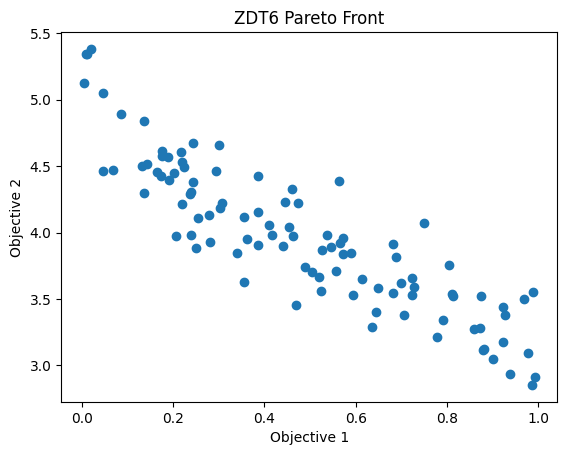

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, random, sample
from itertools import chain

# Initialize a list to store Pareto front objectives
pareto_front_objectives = []

# Store the Pareto front objectives
pareto_front_objectives.append(objectives)

# Plotting the Pareto front
pareto_front_objectives = np.concatenate(pareto_front_objectives)
plt.scatter(pareto_front_objectives[:, 0], pareto_front_objectives[:, 1])
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('ZDT6 Pareto Front')
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210078 sha256=89f9a5bcaa14890bb68bb6c421cf359dace1c0647ed3fa094c1a7254b06e4698
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


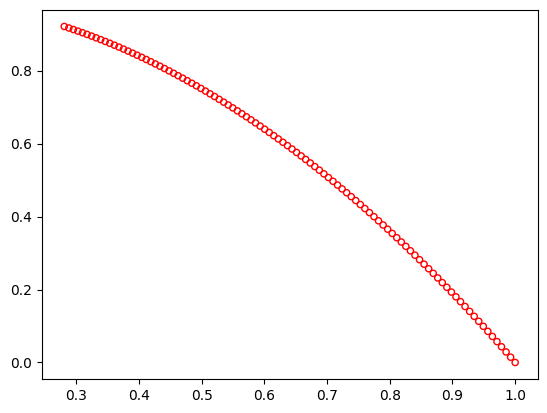

In [ ]:
!pip install pymoo

from pymoo.problems import get_problem
from pymoo.util.plotting import plot

problem = get_problem("zdt6")
plot(problem.pareto_front(), no_fill=True)


# **KUR**

In [ ]:
import numpy as np
from random import randint, random, sample
from itertools import chain

#-------- Step 1. Initialisation --------

# KUR problem parameters
population_size = 100
N = 200  # maximum number of generations
k = 0.05  # fitness scaling factor

num_variables = 100  # number of decision variables for KUR

np.random.seed = 46
# Generate random decision variable values for KUR
decision_variables = np.random.uniform(-5, 5, size=(population_size, num_variables))

# Generate initial population
def generate_population(population_size, num_items):
    population = []
    for _ in range(population_size):
        # Create a random binary string representing the presence or absence of each item in the knapsack
        chromosome = np.random.randint(2, size=num_items)
        population.append(chromosome)
    return population

# Example usage
initial_population = generate_population(population_size, num_variables)
#print("Initial Population: ", initial_population)
m = 0 # generation counter
print("Generation number: ", m)
print(len(initial_population))

#-------- Step 2. Fitness Assignment --------

# As I've understood, here the loop begins
while m < N:
  # Step 2.0: Define KUR objective function
  def kur_objective_function(decision_variables):
      f1 = -10 * np.exp(-0.2 * np.sqrt(decision_variables[:, :-1]**2 + decision_variables[:, 1:]**2))
      f2 = np.abs(decision_variables[:, 2]) + 5 * np.sin(decision_variables[:, 2])

      return np.column_stack((f1, f2))

  # Step 2.1: Determine lower and upper bounds for each objective
  def calculate_bounds(objectives):
      lower_bounds = np.min(objectives, axis=0)
      upper_bounds = np.max(objectives, axis=0)
      return lower_bounds, upper_bounds

  # Step 2.2: Scale objectives to the internal [0,1]
  # Step 2.2: Scale objectives to the internal [0,1]
  def scale_objectives(objectives, lower_bounds, upper_bounds):
      num_objectives = objectives.shape[1]
      scaled_objectives = (objectives - lower_bounds[:num_objectives]) / (upper_bounds[:num_objectives] - lower_bounds[:num_objectives])
      return scaled_objectives

  # Step 2.3: Calculate indicator values
  def calculate_indicator_values(scaled_objectives):
      num_objectives = scaled_objectives.shape[1]
      indicator_values = np.zeros((len(scaled_objectives), len(scaled_objectives)))

      for i in range(len(scaled_objectives)):
          for j in range(len(scaled_objectives)):
              if i != j:
                  diff = scaled_objectives[j] - scaled_objectives[i]
                  indicator_values[i, j] = np.min(diff)

      return indicator_values

  def get_c(indicator_values):
    c = np.max(np.abs(indicator_values))
    return c

  # Step 2.4: Assign fitness values
  def assign_fitness(indicator_values, k):
      c = get_c(indicator_values)
      fitness_values = np.zeros(len(indicator_values))

      for i in range(len(indicator_values)):
          sum_exp = np.sum(np.exp(-indicator_values[i] / (c * k)))
          fitness_values[i] = sum_exp

      return fitness_values

  # Define objectives
  objectives = kur_objective_function(decision_variables)

  # Step 2.1: Calculate lower and upper bounds
  lower_bounds, upper_bounds = calculate_bounds(objectives)

  # Step 2.2: Scale objectives to [0,1]
  scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)

  # Step 2.3: Calculate indicator values
  indicator_values = calculate_indicator_values(scaled_objectives)

  # Step 2.4: Assign fitness values
  fitness_values = assign_fitness(indicator_values, k)

# -------- Step 3. Environmental Selection --------

#Iterate until the population size exceeds population_size
  while len(initial_population) >= population_size:
      # Step 3.1: Choose an individual with the smallest fitness value
      min_fitness_index = np.argmin(fitness_values)
      x_star = initial_population[min_fitness_index]

      # Step 3.2: Remove x* from the population
      initial_population.pop(min_fitness_index)
      fitness_values = np.delete(fitness_values, min_fitness_index)
      print(len(initial_population))

      # Step 3.3: Update fitness values of the remaining individuals
      objectives = kur_objective_function(decision_variables)
      scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)
      calculate_indicator_values(scaled_objectives)
      fitness_values_updated = assign_fitness(indicator_values, k)

# # -------- Step 4. Termination --------
#   if m >= N:
#     print("Pareto Set Approximation: ")
#     A = [individual[0] for individual in initial_population if individual[1] == min(fitness_values)]
#     print(A)
#     break

# -------- Step 5. Mating Selection --------
  selected_indices = [randint(0, len(initial_population) - 1) for _ in range(len(initial_population))]
  mating_pool = [initial_population[index] for index in selected_indices]
  print("Mating Pool: ", len(mating_pool))

# -------- Step 6. Variation --------

  pc = 0.8 # probability of crossover
  pm = 0.06 # probability of mutation

  # Simple single-point crossover
  def crossover(parent1, parent2):
    print("Parent1: ", len(parent1))
    print("Parent2: ", len(parent2))
    crossover_point = randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    #child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1#, child2

  # Simple mutation
  def mutate(individual):
    mutation_point = randint(0, len(individual) - 1)
    individual[mutation_point] = 1 - individual[mutation_point]  # Flip the bit
    return individual

  # Apply crossover with probability crossover_probability
  if random() < pc:
    print("Crossover")
    parent1, parent2 = sample(mating_pool, 2)
    child1 = crossover(parent1, parent2)
  else:
    # If no crossover, select one parent randomly
    child1 = list(chain(*sample(mating_pool, 1))) #child1 = child2 = sample(mating_pool, 1)#[0][0]

  # Apply mutation with probability mutation_probability
  if random() < pm:
    print("Mutation")
    child1 = mutate(child1)

  print("Child: ", child1, "Child length: ", len(child1))
  # Add offspring to the initial population
  initial_population.append((child1))
  objectives = kur_objective_function(decision_variables)

  #print("New Population: ", initial_population)

  m += 1 # incrementing generation counter
  print("Generation number: ", m)

# -------- Step 4. Termination (In Fact Pareto Set Initialisation) --------

print("Pareto Set Approximation: ")
nondominated_indices = np.where(fitness_values == min(fitness_values))[0]
A = [initial_population[i] for i in nondominated_indices]
for individual in A:
  print(individual)

Generation number:  0
100
99
Mating Pool:  99
Crossover
Parent1:  100
Parent2:  100
Child:  [1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0
 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0] Child length:  100
Generation number:  1
99
Mating Pool:  99
Crossover
Parent1:  100
Parent2:  100
Child:  [0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1] Child length:  100
Generation number:  2
99
Mating Pool:  99
Crossover
Parent1:  100
Parent2:  100
Child:  [0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1
 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1
 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0] Child length:  100
Generation number:  3
99
Mating Pool:  99
Child:  [1, 0, 0, 1, 

In [ ]:
KUR_Ic_indicator = indicator_values
print("KUR Problem Ic+-indicator values on the last iteration (200):", '\n')
KUR_Ic_indicator

KUR Problem Ic+-indicator values on the last iteration (200): 



array([[ 0.        , -0.76996405, -0.79909106, ..., -0.75234834,
        -0.70119233, -0.84372081],
       [-0.6446108 ,  0.        , -0.84408761, ..., -0.69561747,
        -0.91463729, -0.90740773],
       [-0.85162787, -0.95416679,  0.        , ..., -0.98601378,
        -0.70442345, -0.8212153 ],
       ...,
       [-0.77765777, -0.95984168, -0.77603596, ...,  0.        ,
        -0.81998695, -0.82096703],
       [-0.86867443, -0.83693326, -0.70954187, ..., -0.74154682,
         0.        , -0.91227422],
       [-0.79510773, -0.96024426, -0.73375001, ..., -0.70447199,
        -0.93287507,  0.        ]])

In [ ]:
len(KUR_Ic_indicator)

100

# **DTLZ2**

In [ ]:
import numpy as np
from random import randint, random, sample
from itertools import chain

#-------- Step 1. Initialisation --------

# DTLZ2 problem parameters
population_size = 100
N = 200  # maximum number of generations
k = 0.05  # fitness scaling factor

num_variables = 10  # number of decision variables for DTLZ2
num_objectives = 3  # number of objectives for DTLZ2

np.random.seed = 46
# Generate random decision variable values for DTLZ2
decision_variables = np.random.uniform(0, 1, size=(population_size, num_variables))

# Generate initial population
def generate_population(population_size, num_items):
    population = []
    for _ in range(population_size):
        # Create a random binary string representing the presence or absence of each item in the knapsack
        chromosome = np.random.randint(2, size=num_items)
        population.append(chromosome)
    return population

# Example usage
initial_population = generate_population(population_size, num_variables)
#print("Initial Population: ", initial_population)
m = 0 # generation counter
print("Generation number: ", m)
print(len(initial_population))

#-------- Step 2. Fitness Assignment --------

# As I've understood, here the loop begins
while m < N:
  # Step 2.0: Define DTLZ2 objective function
  def dtlz2_objective_function(decision_variables, num_objectives):
      g = np.sum((decision_variables[:, num_objectives - 1:]) ** 2, axis=1)
      f1 = (1 + g) * np.prod(np.cos(0.5 * np.pi * decision_variables[:, :num_objectives - 1]), axis=1)
      f2 = (1 + g) * np.prod(np.cos(0.5 * np.pi * decision_variables[:, :num_objectives - 2]) * np.sin(0.5 * np.pi * decision_variables[:, num_objectives - 1]), axis=1)
      f3 = (1 + g) * np.sin(0.5 * np.pi * decision_variables[:, num_objectives - 2])

      return np.column_stack((f1, f2, f3))

  # Step 2.1: Determine lower and upper bounds for each objective
  def calculate_bounds(objectives):
      lower_bounds = np.min(objectives, axis=0)
      upper_bounds = np.max(objectives, axis=0)
      return lower_bounds, upper_bounds

  # Step 2.2: Scale objectives to the internal [0,1]
  # Step 2.2: Scale objectives to the internal [0,1]
  def scale_objectives(objectives, lower_bounds, upper_bounds):
      num_objectives = objectives.shape[1]
      scaled_objectives = (objectives - lower_bounds[:num_objectives]) / (upper_bounds[:num_objectives] - lower_bounds[:num_objectives])
      return scaled_objectives

  # Step 2.3: Calculate indicator values
  def calculate_indicator_values(scaled_objectives):
      num_objectives = scaled_objectives.shape[1]
      indicator_values = np.zeros((len(scaled_objectives), len(scaled_objectives)))

      for i in range(len(scaled_objectives)):
          for j in range(len(scaled_objectives)):
              if i != j:
                  diff = scaled_objectives[j] - scaled_objectives[i]
                  indicator_values[i, j] = np.min(diff)

      return indicator_values

  def get_c(indicator_values):
    c = np.max(np.abs(indicator_values))
    return c

  # Step 2.4: Assign fitness values
  def assign_fitness(indicator_values, k):
      c = get_c(indicator_values)
      fitness_values = np.zeros(len(indicator_values))

      for i in range(len(indicator_values)):
          sum_exp = np.sum(np.exp(-indicator_values[i] / (c * k)))
          fitness_values[i] = sum_exp

      return fitness_values

  # Define objectives
  objectives = dtlz2_objective_function(decision_variables, num_objectives)


  # Step 2.1: Calculate lower and upper bounds
  lower_bounds, upper_bounds = calculate_bounds(objectives)

  # Step 2.2: Scale objectives to [0,1]
  scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)

  # Step 2.3: Calculate indicator values
  indicator_values = calculate_indicator_values(scaled_objectives)

  # Step 2.4: Assign fitness values
  fitness_values = assign_fitness(indicator_values, k)

# -------- Step 3. Environmental Selection --------

#Iterate until the population size exceeds population_size
  while len(initial_population) >= population_size:
      # Step 3.1: Choose an individual with the smallest fitness value
      min_fitness_index = np.argmin(fitness_values)
      x_star = initial_population[min_fitness_index]

      # Step 3.2: Remove x* from the population
      initial_population.pop(min_fitness_index)
      fitness_values = np.delete(fitness_values, min_fitness_index)
      print(len(initial_population))

      # Step 3.3: Update fitness values of the remaining individuals
      objectives = zdt6_objective_function(decision_variables)
      scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)
      calculate_indicator_values(scaled_objectives)
      fitness_values_updated = assign_fitness(indicator_values, k)

# # -------- Step 4. Termination --------
#   if m >= N:
#     print("Pareto Set Approximation: ")
#     A = [individual[0] for individual in initial_population if individual[1] == min(fitness_values)]
#     print(A)
#     break

# -------- Step 5. Mating Selection --------
  selected_indices = [randint(0, len(initial_population) - 1) for _ in range(len(initial_population))]
  mating_pool = [initial_population[index] for index in selected_indices]
  print("Mating Pool: ", len(mating_pool))

# -------- Step 6. Variation --------

  pc = 0.6 # probability of crossover
  pm = 0.04 # probability of mutation

  # Simple single-point crossover
  def crossover(parent1, parent2):
    print("Parent1: ", len(parent1))
    print("Parent2: ", len(parent2))
    crossover_point = randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    #child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1#, child2

  # Simple mutation
  def mutate(individual):
    mutation_point = randint(0, len(individual) - 1)
    individual[mutation_point] = 1 - individual[mutation_point]  # Flip the bit
    return individual

  # Apply crossover with probability crossover_probability
  if random() < pc:
    print("Crossover")
    parent1, parent2 = sample(mating_pool, 2)
    child1 = crossover(parent1, parent2)
  else:
    # If no crossover, select one parent randomly
    child1 = list(chain(*sample(mating_pool, 1))) #child1 = child2 = sample(mating_pool, 1)#[0][0]

  # Apply mutation with probability mutation_probability
  if random() < pm:
    print("Mutation")
    child1 = mutate(child1)

  print("Child: ", child1, "Child length: ", len(child1))
  # Add offspring to the initial population
  initial_population.append((child1))
  objectives = dtlz2_objective_function(decision_variables, num_objectives)

  #print("New Population: ", initial_population)

  m += 1 # incrementing generation counter
  print("Generation number: ", m)

# -------- Step 4. Termination (In Fact Pareto Set Initialisation) --------

print("Pareto Set Approximation: ")
nondominated_indices = np.where(fitness_values == min(fitness_values))[0]
A = [initial_population[i] for i in nondominated_indices]
for individual in A:
  print(individual)

Generation number:  0
100
99
Mating Pool:  99
Child:  [0, 0, 1, 0, 0, 0, 1, 0, 1, 0] Child length:  10
Generation number:  1
99
Mating Pool:  99
Crossover
Parent1:  10
Parent2:  10
Child:  [1 0 1 0 1 1 0 1 1 0] Child length:  10
Generation number:  2
99
Mating Pool:  99
Crossover
Parent1:  10
Parent2:  10
Mutation
Child:  [1 1 1 0 1 0 1 0 0 1] Child length:  10
Generation number:  3
99
Mating Pool:  99
Crossover
Parent1:  10
Parent2:  10
Child:  [1 1 1 1 0 1 0 1 0 0] Child length:  10
Generation number:  4
99
Mating Pool:  99
Crossover
Parent1:  10
Parent2:  10
Child:  [1 1 0 1 1 0 1 0 0 0] Child length:  10
Generation number:  5
99
Mating Pool:  99
Child:  [0, 0, 0, 0, 0, 1, 1, 0, 0, 0] Child length:  10
Generation number:  6
99
Mating Pool:  99
Crossover
Parent1:  10
Parent2:  10
Child:  [0 1 0 0 1 0 1 1 0 0] Child length:  10
Generation number:  7
99
Mating Pool:  99
Crossover
Parent1:  10
Parent2:  10
Child:  [0 0 1 1 1 1 1 1 0 1] Child length:  10
Generation number:  8
99
Mating P

In [ ]:
DTLZ2_Ic_indicator = indicator_values
print("DTLZ2 Problem Ic+-indicator values on the last iteration (200):", '\n')
DTLZ2_Ic_indicator

DTLZ2 Problem Ic+-indicator values on the last iteration (200): 



array([[ 0.00000000e+00, -5.65405448e-01, -4.98716980e-01, ...,
        -5.86016813e-01, -2.30487861e-01, -6.43598385e-01],
       [-2.48171506e-01,  0.00000000e+00, -5.18386928e-27, ...,
        -2.06113657e-02,  3.34917586e-01, -1.81705445e-01],
       [-3.77272708e-01, -1.29101201e-01,  0.00000000e+00, ...,
        -8.72998336e-02,  2.20427606e-01, -3.10806647e-01],
       ...,
       [-6.05032739e-01, -3.56861232e-01, -2.27760031e-01, ...,
         0.00000000e+00, -7.33242514e-03, -5.38566678e-01],
       [-9.67720238e-01, -1.00000000e+00, -1.00000000e+00, ...,
        -1.00000000e+00,  0.00000000e+00, -1.00000000e+00],
       [-6.64660611e-02,  5.18386928e-27,  8.86394826e-65, ...,
         4.77137968e-43,  4.13110524e-01,  0.00000000e+00]])

Pareto Set Approximation: 


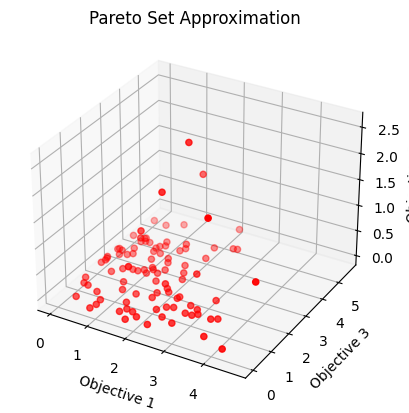

In [ ]:
import matplotlib.pyplot as plt

print("Pareto Set Approximation: ")
nondominated_indices = np.where(fitness_values == min(fitness_values))[0]
pareto_set = [initial_population[i] for i in nondominated_indices]

# Extracting the objectives of the Pareto Set
pareto_objectives = objectives

# Scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pareto_objectives[:, 0], pareto_objectives[:, 2], pareto_objectives[:, 1], c='r', marker='o')

ax.set_xlabel('Objective 1')
ax.set_ylabel('Objective 3')
ax.set_zlabel('Objective 2')
ax.set_title('Pareto Set Approximation')

plt.show()

# **DTLZ6**

In [ ]:
import numpy as np
from random import randint, random, sample
from itertools import chain

#-------- Step 1. Initialisation --------

# DTLZ6 problem parameters
population_size = 100
N = 200  # maximum number of generations
k = 0.05  # fitness scaling factor

num_variables = 10  # number of decision variables for DTLZ6
num_objectives = 3  # number of objectives for DTLZ6

np.random.seed = 46
# Generate random decision variable values for DTLZ6
decision_variables = np.random.uniform(0, 1, size=(population_size, num_variables))

# Generate initial population
def generate_population(population_size, num_items):
    population = []
    for _ in range(population_size):
        # Create a random binary string representing the presence or absence of each item in the knapsack
        chromosome = np.random.randint(2, size=num_items)
        population.append(chromosome)
    return population

# Example usage
initial_population = generate_population(population_size, num_variables)
#print("Initial Population: ", initial_population)
m = 0 # generation counter
print("Generation number: ", m)
print(len(initial_population))

#-------- Step 2. Fitness Assignment --------

# As I've understood, here the loop begins
while m < N:
  # Step 2.0: Define DTLZ6 objective function
  def dtlz6_objective_function(decision_variables, num_objectives):
      g = np.sum(decision_variables[:, num_objectives - 1:] ** 0.1, axis=1)
      f1 = (1 + g) * np.prod(np.cos(0.5 * np.pi * decision_variables[:, :num_objectives - 1]), axis=1)
      f2 = (1 + g) * np.prod(np.cos(0.5 * np.pi * decision_variables[:, :num_objectives - 2]) * np.sin(0.5 * np.pi * decision_variables[:, num_objectives - 1]), axis=1)
      f3 = (1 + g) * np.sin(0.5 * np.pi * decision_variables[:, num_objectives - 2])

      return np.column_stack((f1, f2, f3))

  # Step 2.1: Determine lower and upper bounds for each objective
  def calculate_bounds(objectives):
      lower_bounds = np.min(objectives, axis=0)
      upper_bounds = np.max(objectives, axis=0)
      return lower_bounds, upper_bounds

  # Step 2.2: Scale objectives to the internal [0,1]
  # Step 2.2: Scale objectives to the internal [0,1]
  def scale_objectives(objectives, lower_bounds, upper_bounds):
      num_objectives = objectives.shape[1]
      scaled_objectives = (objectives - lower_bounds[:num_objectives]) / (upper_bounds[:num_objectives] - lower_bounds[:num_objectives])
      return scaled_objectives

  # Step 2.3: Calculate indicator values
  def calculate_indicator_values(scaled_objectives):
      num_objectives = scaled_objectives.shape[1]
      indicator_values = np.zeros((len(scaled_objectives), len(scaled_objectives)))

      for i in range(len(scaled_objectives)):
          for j in range(len(scaled_objectives)):
              if i != j:
                  diff = scaled_objectives[j] - scaled_objectives[i]
                  indicator_values[i, j] = np.min(diff)

      return indicator_values

  def get_c(indicator_values):
    c = np.max(np.abs(indicator_values))
    return c

  # Step 2.4: Assign fitness values
  def assign_fitness(indicator_values, k):
      c = get_c(indicator_values)
      fitness_values = np.zeros(len(indicator_values))

      for i in range(len(indicator_values)):
          sum_exp = np.sum(np.exp(-indicator_values[i] / (c * k)))
          fitness_values[i] = sum_exp

      return fitness_values

  # Define objectives
  objectives = dtlz6_objective_function(decision_variables, num_objectives)


  # Step 2.1: Calculate lower and upper bounds
  lower_bounds, upper_bounds = calculate_bounds(objectives)

  # Step 2.2: Scale objectives to [0,1]
  scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)

  # Step 2.3: Calculate indicator values
  indicator_values = calculate_indicator_values(scaled_objectives)

  # Step 2.4: Assign fitness values
  fitness_values = assign_fitness(indicator_values, k)

# -------- Step 3. Environmental Selection --------

#Iterate until the population size exceeds population_size
  while len(initial_population) >= population_size:
      # Step 3.1: Choose an individual with the smallest fitness value
      min_fitness_index = np.argmin(fitness_values)
      x_star = initial_population[min_fitness_index]

      # Step 3.2: Remove x* from the population
      initial_population.pop(min_fitness_index)
      fitness_values = np.delete(fitness_values, min_fitness_index)
      print(len(initial_population))

      # Step 3.3: Update fitness values of the remaining individuals
      objectives = zdt6_objective_function(decision_variables)
      scaled_objectives = scale_objectives(objectives, lower_bounds, upper_bounds)
      calculate_indicator_values(scaled_objectives)
      fitness_values_updated = assign_fitness(indicator_values, k)

# # -------- Step 4. Termination --------
#   if m >= N:
#     print("Pareto Set Approximation: ")
#     A = [individual[0] for individual in initial_population if individual[1] == min(fitness_values)]
#     print(A)
#     break

# -------- Step 5. Mating Selection --------
  selected_indices = [randint(0, len(initial_population) - 1) for _ in range(len(initial_population))]
  mating_pool = [initial_population[index] for index in selected_indices]
  print("Mating Pool: ", len(mating_pool))

# -------- Step 6. Variation --------

  pc = 0.8 # probability of crossover
  pm = 0.06 # probability of mutation

  # Simple single-point crossover
  def crossover(parent1, parent2):
    print("Parent1: ", len(parent1))
    print("Parent2: ", len(parent2))
    crossover_point = randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    #child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1#, child2

  # Simple mutation
  def mutate(individual):
    mutation_point = randint(0, len(individual) - 1)
    individual[mutation_point] = 1 - individual[mutation_point]  # Flip the bit
    return individual

  # Apply crossover with probability crossover_probability
  if random() < pc:
    print("Crossover")
    parent1, parent2 = sample(mating_pool, 2)
    child1 = crossover(parent1, parent2)
  else:
    # If no crossover, select one parent randomly
    child1 = list(chain(*sample(mating_pool, 1))) #child1 = child2 = sample(mating_pool, 1)#[0][0]

  # Apply mutation with probability mutation_probability
  if random() < pm:
    print("Mutation")
    child1 = mutate(child1)

  print("Child: ", child1, "Child length: ", len(child1))
  # Add offspring to the initial population
  initial_population.append((child1))
  objectives = dtlz6_objective_function(decision_variables, num_objectives)

  #print("New Population: ", initial_population)

  m += 1 # incrementing generation counter
  print("Generation number: ", m)

# -------- Step 4. Termination (In Fact Pareto Set Initialisation) --------

print("Pareto Set Approximation: ")
nondominated_indices = np.where(fitness_values == min(fitness_values))[0]
A = [initial_population[i] for i in nondominated_indices]
for individual in A:
  print(individual)

Generation number:  0
100
99
Mating Pool:  99
Crossover
Parent1:  10
Parent2:  10
Child:  [0 1 0 0 1 1 0 1 1 1] Child length:  10
Generation number:  1
99
Mating Pool:  99
Crossover
Parent1:  10
Parent2:  10
Child:  [1 0 1 1 0 0 0 0 0 1] Child length:  10
Generation number:  2
99
Mating Pool:  99
Crossover
Parent1:  10
Parent2:  10
Child:  [1 0 0 1 0 0 0 0 1 0] Child length:  10
Generation number:  3
99
Mating Pool:  99
Child:  [0, 1, 1, 0, 1, 0, 0, 1, 0, 0] Child length:  10
Generation number:  4
99
Mating Pool:  99
Crossover
Parent1:  10
Parent2:  10
Child:  [0 1 1 1 1 0 0 0 1 1] Child length:  10
Generation number:  5
99
Mating Pool:  99
Crossover
Parent1:  10
Parent2:  10
Child:  [0 1 0 1 0 1 0 0 1 0] Child length:  10
Generation number:  6
99
Mating Pool:  99
Crossover
Parent1:  10
Parent2:  10
Child:  [1 1 1 0 0 0 0 1 0 0] Child length:  10
Generation number:  7
99
Mating Pool:  99
Child:  [0, 1, 1, 0, 1, 1, 1, 1, 1, 1] Child length:  10
Generation number:  8
99
Mating Pool:  99


In [ ]:
DTLZ6_Ic_indicator = indicator_values
print("DTLZ6 Problem Ic+-indicator values on the last iteration (200):", '\n')
DTLZ6_Ic_indicator

DTLZ6 Problem Ic+-indicator values on the last iteration (200): 



array([[ 0.00000000e+00, -6.44536351e-01, -2.49239767e-01, ...,
        -4.22913175e-01, -2.32173761e-01, -2.12518850e-01],
       [-9.00192865e-01,  0.00000000e+00, -9.31910463e-02, ...,
        -4.13052792e-01, -3.46757505e-01, -2.34424238e-01],
       [-8.07001819e-01, -3.95296584e-01,  0.00000000e+00, ...,
        -3.35910296e-01, -3.35910296e-01, -3.35565106e-01],
       ...,
       [-4.87140073e-01, -2.21623177e-01,  1.73673407e-01, ...,
         0.00000000e+00,  1.58833585e-22,  3.45189709e-04],
       [-5.53435361e-01, -4.12362591e-01, -1.70660063e-02, ...,
        -1.90739414e-01,  0.00000000e+00,  3.45189709e-04],
       [-6.65768628e-01, -4.32017501e-01, -3.67209169e-02, ...,
        -2.10394324e-01, -1.12333267e-01,  0.00000000e+00]])

Pareto Set Approximation: 


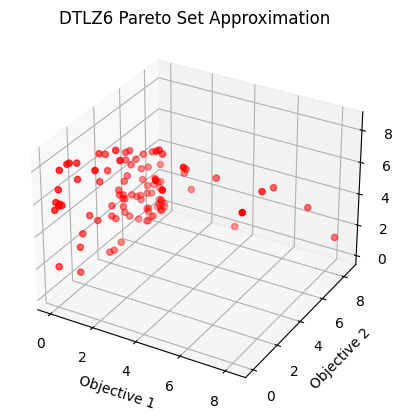

In [ ]:
import numpy as np
from random import randint, random, sample
from itertools import chain
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print("Pareto Set Approximation: ")
pareto_objectives = objectives

# Scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pareto_objectives[:, 1], pareto_objectives[:, 2], pareto_objectives[:, 0], c='r', marker='o')

ax.set_xlabel('Objective 1')
ax.set_ylabel('Objective 2')
ax.set_zlabel('Objective 3')
ax.set_title('DTLZ6 Pareto Set Approximation')

plt.show()

#**DRAFTS AND FAILED TRIES**

## **Reinventing from jmetalpy**

In [ ]:
import random
import numpy as np

np.random.seed(43)
# ZDT6 problem definition
def zdt6(individual):
    f1 = individual[0]
    g = 1 + 9 * sum(individual[1:]) / (len(individual) - 1)
    f2 = g * (1 - np.sqrt(f1 / g))
    return [f1, f2]

# Initialization
def initialize_population(population_size, decision_space_dim):
    population = []
    for _ in range(population_size):
        individual = [random.uniform(0, 1) for _ in range(decision_space_dim)]
        population.append(individual)
    return population

# Dominance check
def dominates(solution1, solution2):
    return all(s1 <= s2 for s1, s2 in zip(solution1, solution2)) and any(s1 < s2 for s1, s2 in zip(solution1, solution2))

# Fitness assignment using IBEA
def ibea_fitness(population, epsilon):
    fitness = [0] * len(population)
    for i, ind1 in enumerate(population):
        for ind2 in population:
            if dominates(ind1, ind2):
                fitness[i] += 1
        fitness[i] -= epsilon
    return fitness

# Tournament selection
def tournament_selection(population, fitness, tournament_size):
    selected_indices = random.sample(range(len(population)), tournament_size)
    winner_index = min(selected_indices, key=lambda i: fitness[i])
    return winner_index

# Genetic operators: crossover and mutation
def crossover(parent1, parent2):
    crossover_point = random.randint(0, len(parent1) - 1)
    child = parent1[:crossover_point] + parent2[crossover_point:]
    return child

def mutate(individual, mutation_rate):
    mutated_individual = [gene + mutation_rate * random.uniform(-1, 1) for gene in individual]
    return mutated_individual

# Main evolutionary algorithm loop
def ibea_algorithm(population_size, decision_space_dim, generations, epsilon, tournament_size, mutation_rate):
    population = initialize_population(population_size, decision_space_dim)

    for generation in range(generations):
        fitness = ibea_fitness(population, epsilon)

        new_population = []
        for _ in range(population_size):
            parent1_index = tournament_selection(population, fitness, tournament_size)
            parent2_index = tournament_selection(population, fitness, tournament_size)
            parent1 = population[parent1_index]
            parent2 = population[parent2_index]

            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)

            new_population.append(child)

        population = new_population

    return population

# Example usage
population_size = 100
decision_space_dim = 20
generations = 100
epsilon = 0.0005
tournament_size = 10
mutation_rate = 0.2

final_population = ibea_algorithm(population_size, decision_space_dim, generations, epsilon, tournament_size, mutation_rate)

# Print the final Pareto front
A = zdt6(ind)
for ind in final_population:
    print(A)

[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]
[0.9168931651617531, 5.043508186011988]


<ipython-input-44-fca3041955cd>:9: RuntimeWarning: invalid value encountered in sqrt
  f2 = g * (1 - np.sqrt(f1 / g))


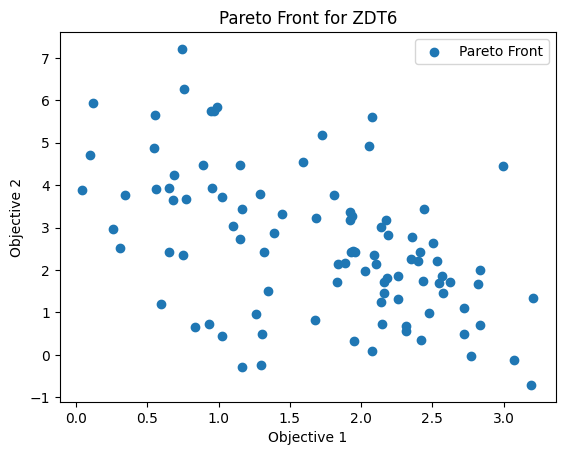

In [ ]:
import matplotlib.pyplot as plt

# Extracting the Pareto front values from the final_population
pareto_front = [zdt6(ind) for ind in final_population]

# Separate the objectives into two lists for x and y axes
f1_values = [ind[0] for ind in pareto_front]
f2_values = [ind[1] for ind in pareto_front]

# Create a scatter plot
plt.scatter(f1_values, f2_values, label='Pareto Front')

# Set labels and title
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('Pareto Front for ZDT6')

# Show the plot
plt.legend()
plt.show()